<a href="https://colab.research.google.com/github/tavaresRamon/previsao/blob/main/AnaliseSerieTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
# DADOS REFERENTE A FREQUÊNCIA E PESQUISA SOBRE O ASSUNTO "CIÊNCIA" NO YOUTUBE
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
# Carregar o arquivo do computador
carregarArquivo = files.upload()
nomeArquivo = list(carregarArquivo.keys())[0]
# Carregar arquivo csv, pulando o cabeçalho
dados = pd.read_csv(nomeArquivo, skiprows=[0])

Saving multiTimeline.csv to multiTimeline.csv


In [262]:
# Criando DataFrame a partir dos dados
# Bando de dados extraído do Google Trends
df = pd.DataFrame(dados)
df

Mês  Geo: Brasil  Diferenca   Ano  Mês_do_Ano
0   2008-01-01           46        0.0  2008           1
1   2008-02-01           63       17.0  2008           2
2   2008-03-01           80       17.0  2008           3
3   2008-04-01           78       -2.0  2008           4
4   2008-05-01           76       -2.0  2008           5
..         ...          ...        ...   ...         ...
183 2023-04-01           94       -4.0  2023           4
184 2023-05-01           92       -2.0  2023           5
185 2023-06-01           88       -4.0  2023           6
186 2023-07-01           76      -12.0  2023           7
187 2023-08-01           80        4.0  2023           8

[188 rows x 5 columns]

In [4]:
# Converter a coluna "Mês" para o formato de data
df['Mês'] = pd.to_datetime(dados['Mês']).dt.strftime('%Y-%m')
print(df['Mês'])

0      2008-01
1      2008-02
2      2008-03
3      2008-04
4      2008-05
        ...   
183    2023-04
184    2023-05
185    2023-06
186    2023-07
187    2023-08
Name: Mês, Length: 188, dtype: object


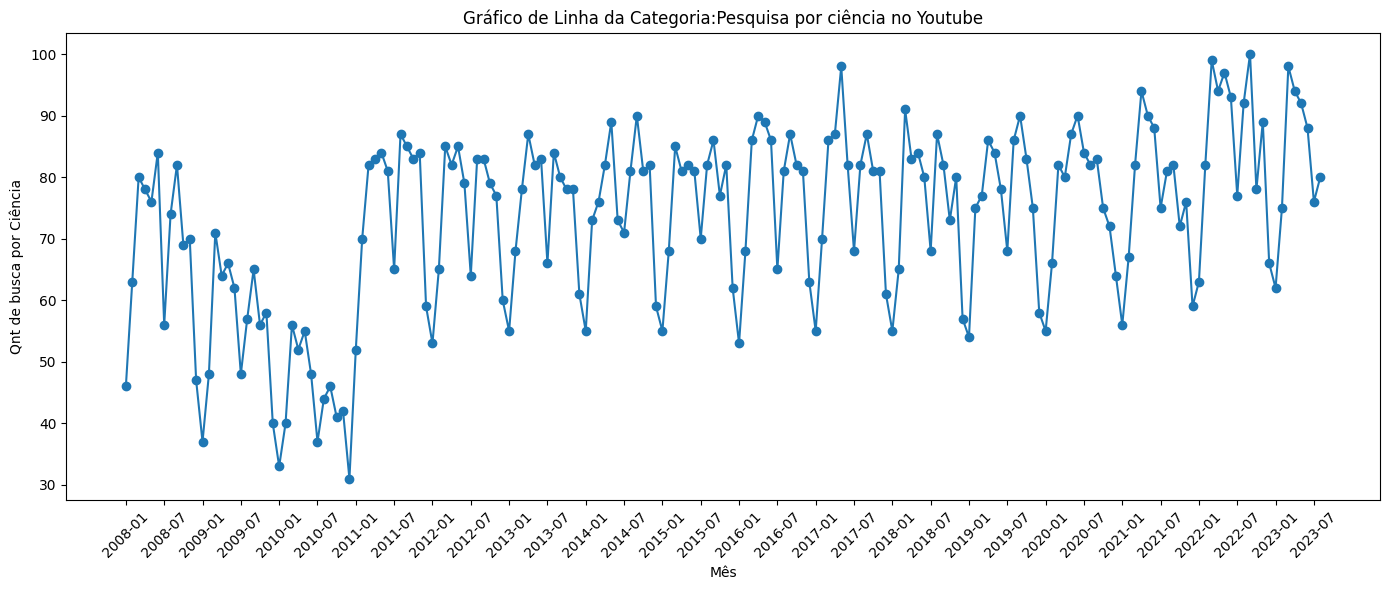

In [5]:
# Criar gráfico de linha
plt.figure(figsize=(14,6))
plt.plot(df['Mês'],df['Geo: Brasil'],marker='o')
plt.xlabel('Mês')
plt.ylabel('Qnt de busca por Ciência')
plt.title('Gráfico de Linha da Categoria:Pesquisa por ciência no Youtube')
plt.xticks(df['Mês'][::6], rotation=45)
plt.tight_layout()
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

# Definindo o nível de significância para o teste ADF
significancia = 0.05

# Aplicando o teste ADF à série temporal 'Geo: Brasil'
resultadoAdf = adfuller(df['Geo: Brasil'])

# Extraindo o p-valor e a estatística ADF do resultado do teste
pValor = resultadoAdf[1]
estatisticaAdf = resultadoAdf[0]

# Extraindo os valores críticos do resultado do teste
valoresCriticos = resultadoAdf[4]

# p-valor < significância A série será considerada estacionária
if pValor < significancia and estatisticaAdf < valoresCriticos['1%']:
  print("Estatística ADF: {:.2f}".format(estatisticaAdf))
  print("P-Valor: {:.4f}".format(pValor))
  print("A série é estacionária")
else:
  print("A série Não é estacionária !")

A série Não é estacionária !


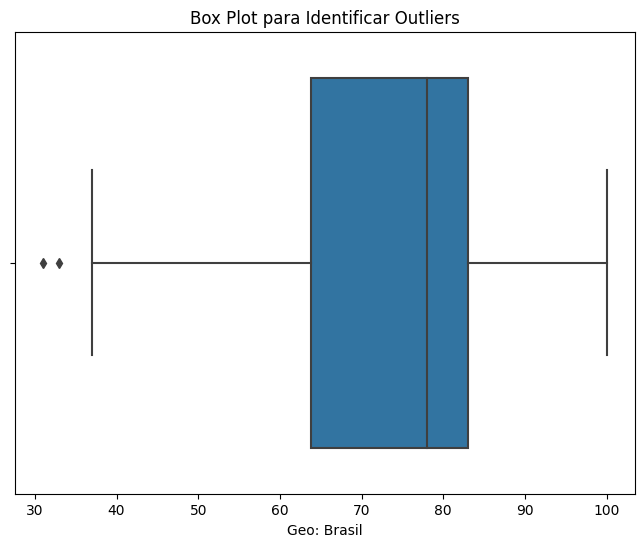

In [7]:
# Plotar o boxplot para vizualização de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Geo: Brasil', data=df)
plt.title('Box Plot para Identificar Outliers')
plt.show()

In [148]:
# A diferenciação é um método comum para tornar a série estacionária. Você pode
# calcular a diferença entre os valores sucessivos da série. Isso pode ser feito
# uma ou mais vezes até que a série se torne estacionária. Por exemplo, podemos
# calcular a primeira diferença subtraindo cada valor pelo seu valor anterior.

# Aplicando o teste adfuller nos dados "transformados" ou diferenciados..
serieDiferenciada = df['Geo: Brasil'].diff().fillna(0)
df['Diferenca'] = serieDiferenciada
resultadoDiferenca = adfuller(serieDiferenciada)
pValo = resultadoDiferenca[1]
estatisticAdf = resultadoDiferenca[0]
valoresCritico = resultadoDiferenca[4]

if pValo < significancia and estatisticAdf < valoresCritico['1%']:
  print("Estatística ADF: {:.2f}".format(estatisticAdf))
  print("P-Valor: {:.4f}".format(pValo))
  print("A série é estacionária (não rejeita a hipótese nula)")
else:
  print("A série não é estacionária (rejeita a hipótese nula)")

Estatística ADF: -3.85
P-Valor: 0.0024
A série é estacionária (não rejeita a hipótese nula)


In [160]:
from statsmodels.tsa.stattools import kpss
# Uma segunda opção para testar estacionariedade é o pacote Kpss
# Aplicar o teste KPSS
result_kpss = kpss(serieDiferenciada)

# Interpretar os resultados
# print("Estatística KPSS: ", result_kpss[0])
print("Valor-p: ", result_kpss[1])
# print("Nº de Lags Usados: ", result_kpss[2])
# print("Valores Críticos: ", result_kpss[3])

# Nesse caso é o seguinte: Para a série ser estacionária segundo a análise do
# teste kpss o p-valor deve ser maior que o nível de significância.
if result_kpss[1] < 0.05:
    print("A série é não estacionária (rejeita a hipótese nula)")
else:
    print("A série é estacionária (não rejeita a hipótese nula)")

Valor-p:  0.1
A série é estacionária (não rejeita a hipótese nula)


<ipython-input-160-ac3ba00b8e9a>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(serieDiferenciada)


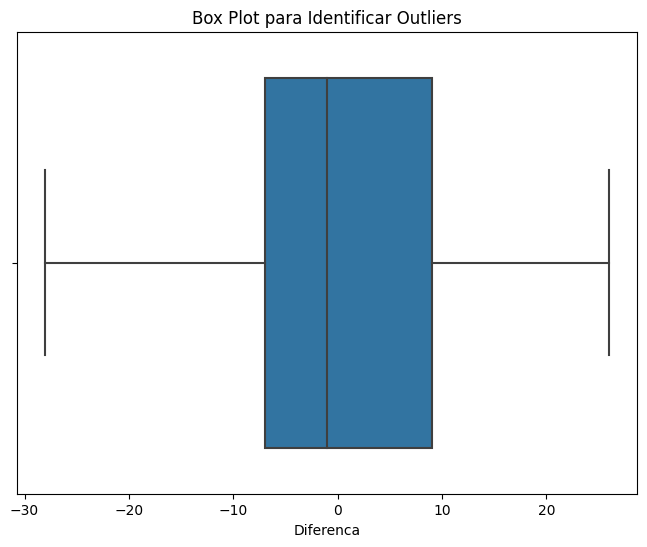

In [150]:
# BoxPlot para os dados diferenciados já nos mostra ausência de outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diferenca', data=df)
plt.title('Box Plot para Identificar Outliers')
plt.show()

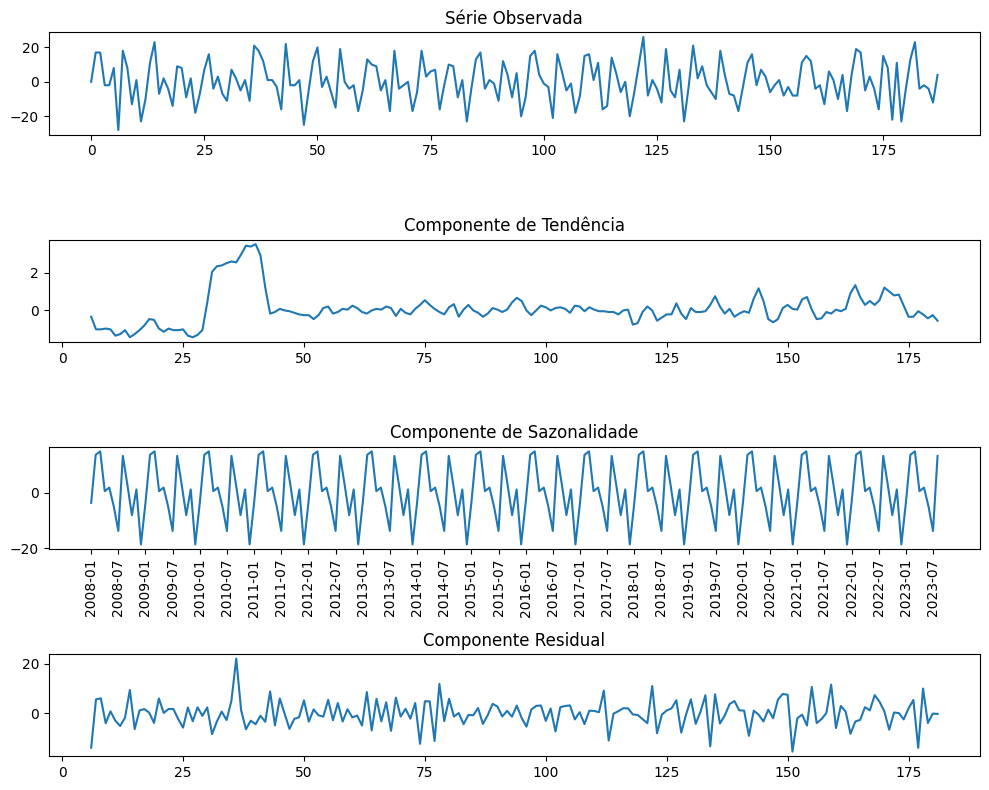

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar a decomposição sazonal usando o método SEATS

# Período sazonal de 12 para sazonalidade anual
result = seasonal_decompose(serieDiferenciada, model='aditive', period=12)

# Plot dos componentes da decomposição
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Série Observada')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Componente de Tendência')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Componente de Sazonalidade')

# Configurar os rótulos do eixo x
plt.xticks(range(len(dados['Mês']))[::6], dados['Mês'][::6],
           rotation='vertical')


plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Componente Residual')

plt.tight_layout()
plt.show()
# Nesse Gráfico é possível analizar um padrão sazonal aproximadamente entre os
# meses 7 e 12 ou seja em períodos no meio do ano bem como do final e início do
# ano. Isso explica o porquê a busca por conteúdos sobre ciência no youtube
# decai nesses períodos semestrais...

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
total_meses = df['Mês'].count()
# Dividindo os meus dados em treino e teste
# dividindo 75% dos dados em Treino e 25% em teste
split = (total_meses * 0.75).astype(int)
treino = df[0:split]
teste = df[split:]

In [159]:
print("Total de dados: ", total_meses)
print("75% ficou como Treino: ",len(treino))
print("25% ficou como Teste: ",len(teste))

Total de dados:  188
75% ficou como Treino:  141
25% ficou como Teste:  47


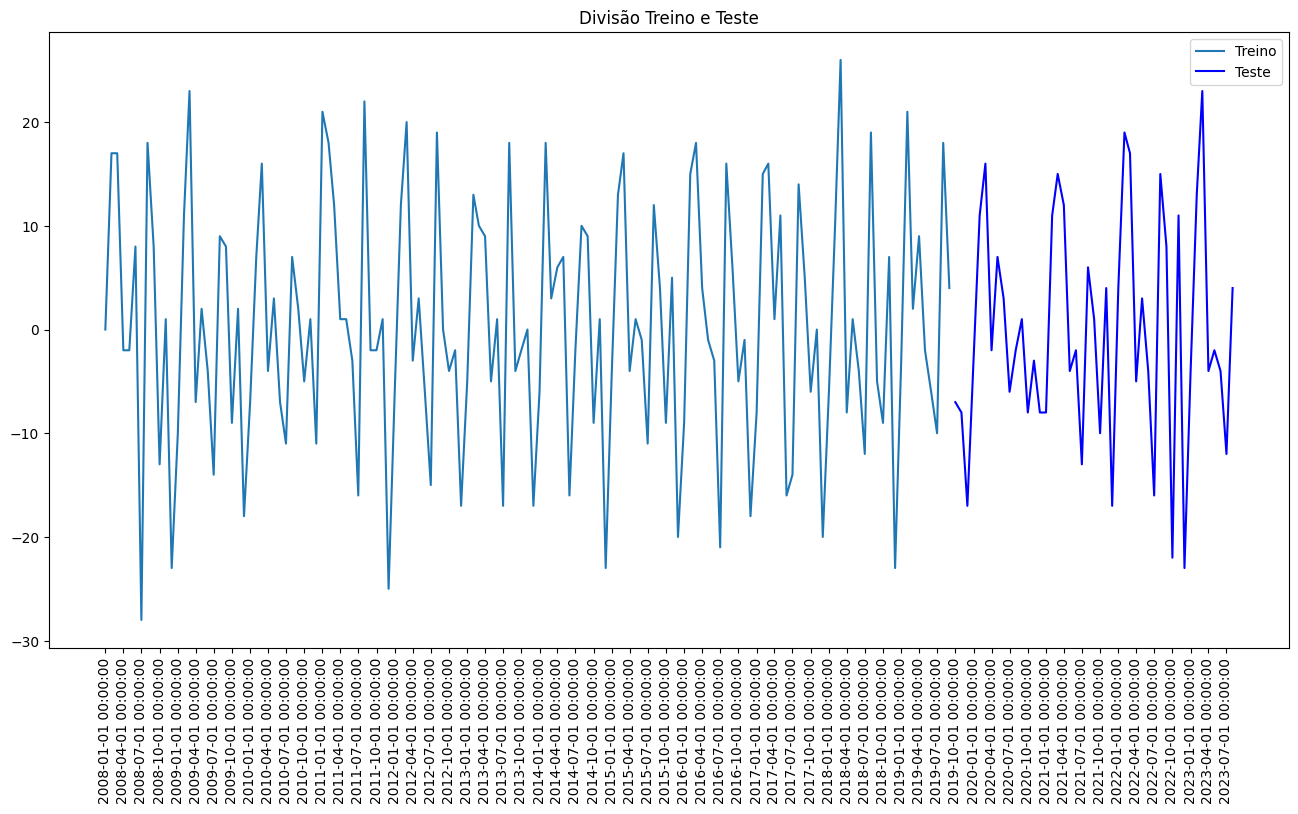

In [162]:
# Plotando os dados dividiso em Treino e Teste
plt.figure(figsize=(16,8))
plt.plot(treino['Mês'],treino['Diferenca'],label='Treino')
plt.plot(teste['Mês'],teste['Diferenca'], label ='Teste',color="blue")
plt.xticks(df['Mês'][::3],df['Mês'][::3],rotation='vertical')
plt.legend(loc='best')
plt.title('Divisão Treino e Teste')
plt.show()

In [163]:
# AR(Auto Regressivo)
from statsmodels.tsa.ar_model import AutoReg as autoregressivo
# Frequência dos dados seja mensal
freq = 12
modeloAutoReg = autoregressivo(endog=treino['Diferenca'],
                               lags = 20,
                               trend='c',
                               seasonal = True,
                               exog=None,
                               hold_back=None,
                               period=freq,
                               missing='none')
# Hiperparâmetros
# endog: variável dependente, variável resposta ou y (endógena)
# exog: variável independente, variável explicativa ou x (exógena)
# lags: o número de defasagens (atrasos) a serem incluídas no modelo
# [1, 12] incluirá apenas as defasagens 1 e 12
# enquanto lags=12 incluirá as defasagens 1, 2, 3 , 4...12
# trend: tendência a ser incluída no modelo
# {'n', 'c', 't', 'ct'}
# ‘n’ - Sem tendência.
# ‘c’ - Apenas constante.
# ‘t’ - Apenas tendência temporal.
# ‘ct’ - Constante e tendência temporal.
# seasonal: se incluir variáveis sazonais no modelo.
# hold_back: número de observações que você deixa de fora da parte de
# treinamento do modelo
fitAutoReg = modeloAutoReg.fit()
print("Coeficientes: \n%s" % fitAutoReg.params)

Coeficientes: 
const            -3.164759
s(2,12)          21.364820
s(3,12)          21.976227
s(4,12)           4.482565
s(5,12)           3.139206
s(6,12)          -2.083897
s(7,12)          -8.129531
s(8,12)          17.935652
s(9,12)           5.499179
s(10,12)         -4.596736
s(11,12)          0.241185
s(12,12)        -17.817804
Diferenca.L1     -0.313128
Diferenca.L2      0.046278
Diferenca.L3     -0.026764
Diferenca.L4     -0.126008
Diferenca.L5     -0.056171
Diferenca.L6      0.111833
Diferenca.L7      0.004622
Diferenca.L8     -0.038201
Diferenca.L9     -0.105344
Diferenca.L10     0.027551
Diferenca.L11    -0.122834
Diferenca.L12    -0.286686
Diferenca.L13     0.063502
Diferenca.L14     0.053345
Diferenca.L15     0.054492
Diferenca.L16    -0.067931
Diferenca.L17    -0.056412
Diferenca.L18     0.046504
Diferenca.L19     0.043431
Diferenca.L20    -0.098475
dtype: float64


In [164]:
from statsmodels.tsa.base import prediction
# Predição
predicoesAr = fitAutoReg.predict(start=len(treino),
                               end=len(treino)+len(teste) - 1,
                               dynamic=False)
predicoesAr.name = "Predicões"
resultadoAr = pd.concat([teste,predicoesAr],axis=1)
print(resultadoAr)

           Mês  Geo: Brasil  Diferenca   Ano  Mês_do_Ano  Predicões
141 2019-10-01           83       -7.0  2019          10  -5.398861
142 2019-11-01           75       -8.0  2019          11  -3.290882
143 2019-12-01           58      -17.0  2019          12 -15.985923
144 2020-01-01           55       -3.0  2020           1  -6.504118
145 2020-02-01           66       11.0  2020           2  17.042872
146 2020-03-01           82       16.0  2020           3  15.857036
147 2020-04-01           80       -2.0  2020           4  -3.460159
148 2020-05-01           87        7.0  2020           5   5.396857
149 2020-06-01           90        3.0  2020           6  -8.553551
150 2020-07-01           84       -6.0  2020           7 -13.715321
151 2020-08-01           82       -2.0  2020           8  16.426309
152 2020-09-01           83        1.0  2020           9   0.721027
153 2020-10-01           75       -8.0  2020          10  -5.226169
154 2020-11-01           72       -3.0  2020    

In [16]:
# Medindo o desempenho
from sklearn.metrics import mean_squared_error as erroQuadratico
from math import sqrt
rmseAr = sqrt(erroQuadratico(teste['Diferenca'],predicoesAr))
print("AR - Raiz Quadrada do Erro Médio (RMSE): %.3f" % rmseAr)

AR - Raiz Quadrada do Erro Médio (RMSE): 6.590


Text(0.5, 1.0, 'Predições por Modelo Autorregressivo (AR)')

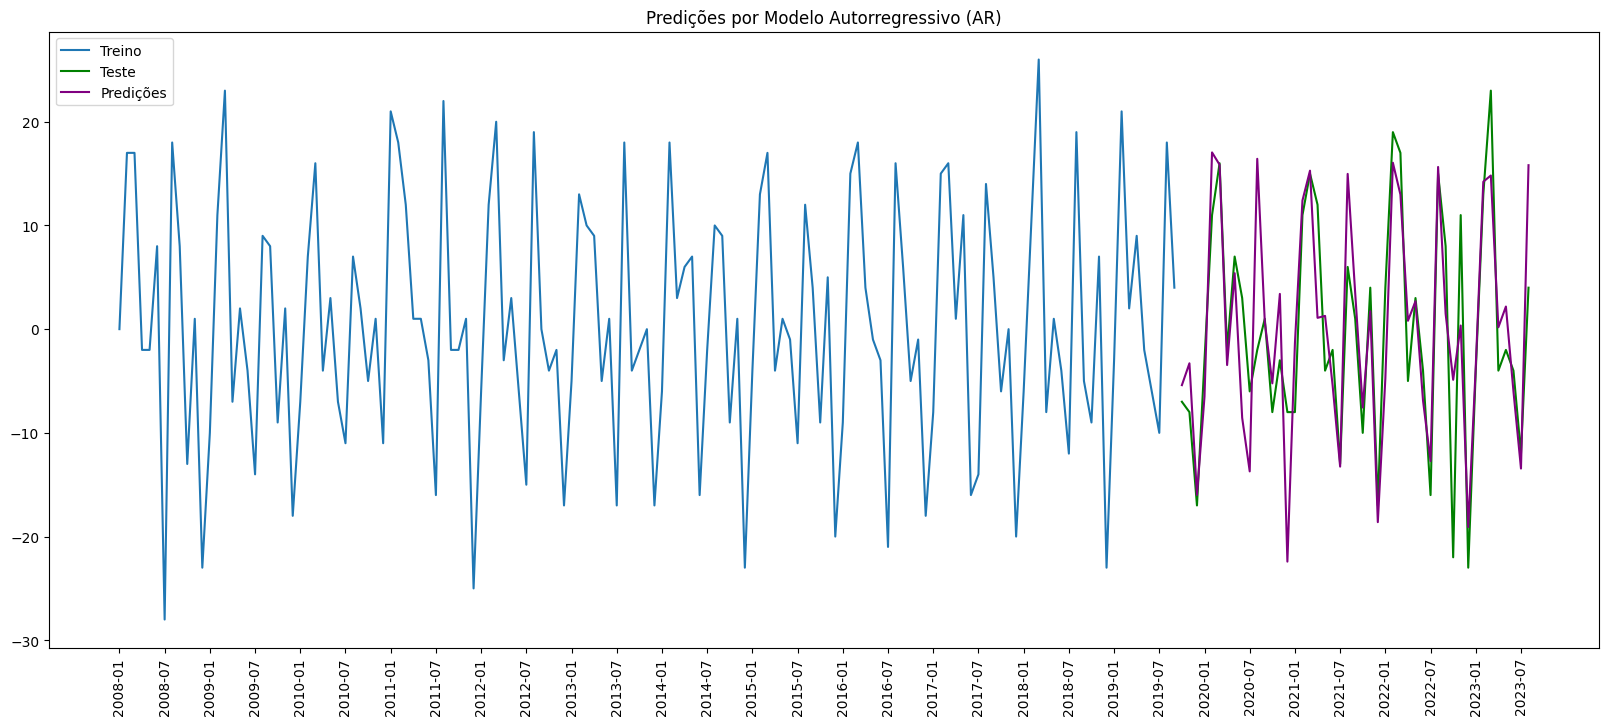

In [17]:
# Plotando as previsões
plt.figure(figsize=(20,8))
plt.plot(treino['Mês'],treino['Diferenca'],label="Treino")
plt.plot(teste['Mês'],teste['Diferenca'],label="Teste",color="green")
plt.plot(resultadoAr['Mês'],resultadoAr['Predicões'],
         label='Predições',color="purple")

plt.xticks(df['Mês'][::6],df['Mês'][::6],rotation='vertical')
plt.legend(loc='best')
plt.title("Predições por Modelo Autorregressivo (AR)")

Text(0.5, 1.0, 'Predições por Modelo Autorregressivo (AR)')

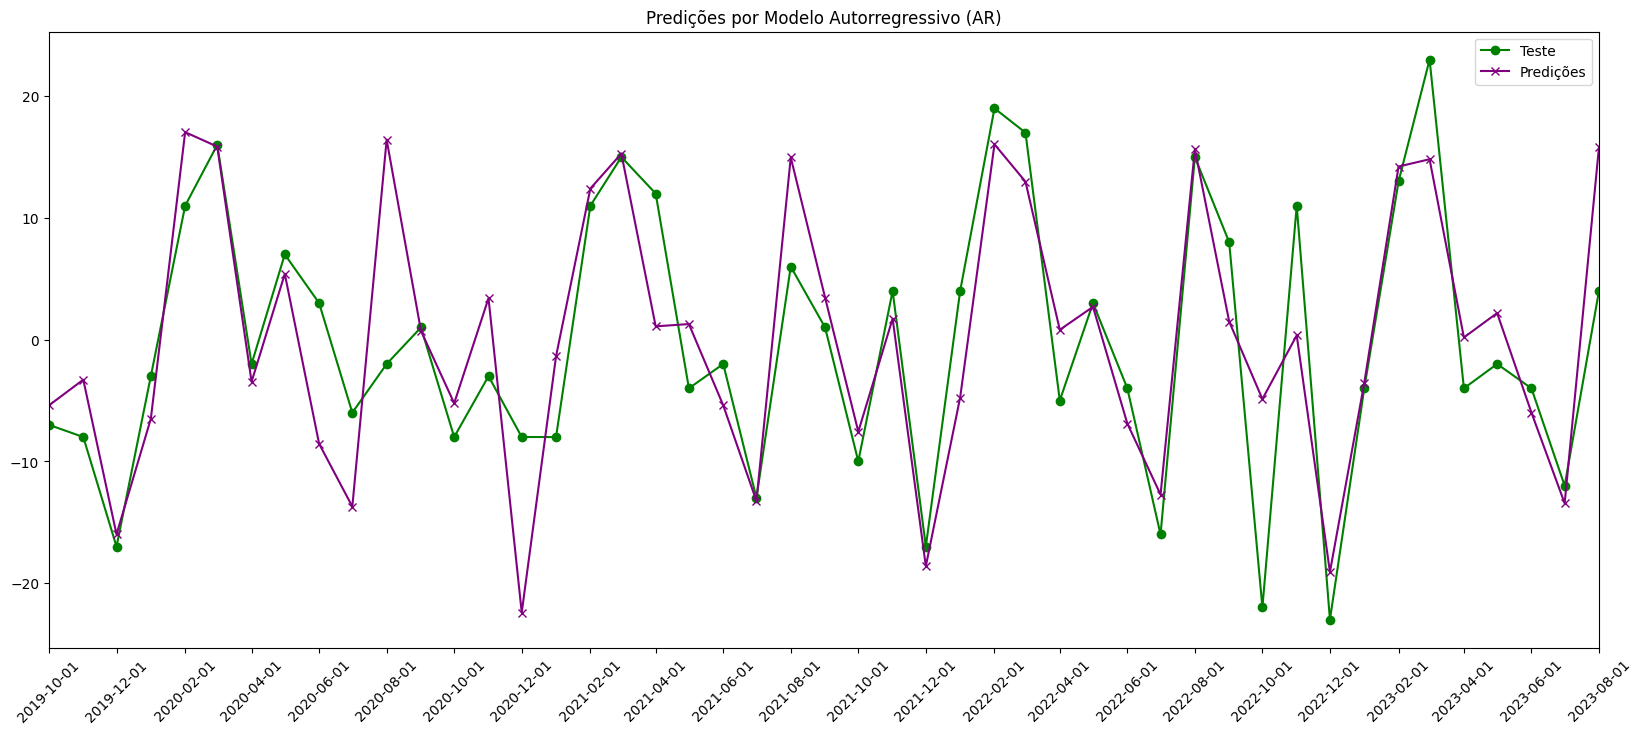

In [166]:
# Plotando as previsões (AR)
plt.figure(figsize=(20,8))
plt.plot(resultadoAr['Mês'],resultadoAr['Diferenca'],
         label="Teste",color="green",marker='o')

plt.plot(resultadoAr['Mês'],resultadoAr['Predicões'],
         label='Predições',color="purple",marker='x')

plt.legend(loc='best')
plt.xlim(resultadoAr['Mês'].iloc[0],resultadoAr['Mês'].iloc[-1])
plt.xticks(resultadoAr['Mês'][::2], rotation=45)
plt.title("Predições por Modelo Autorregressivo (AR)")

In [19]:
# FUNÇÃO "reversaoDiferenca" criado exatamente para reverter a "transformação"
# que foi feita usando o método da diferenciação, que foi necessário para remo-
# ver certas tendências e transformar nossos dados estacionários.

# Exemplo do código cumsum(): (1,2,5) = 2-1=1,5-2=3 =>diferenciados> (0,1,3)
# Aplicando o cumsum()=> valorInicial = 1 => 1+0=1,1+1=2,2+3=5 =>(1,2,5)
# o Cumsum() retorna os valores a partir do primeiro valor original e soma com
# o próximo até retornar todos os valores originais.
def reversaoDiferenca(dadosPreditos,dadosTeste,valorInicialTeste):
  cumsum_predicoes = dadosPreditos.cumsum() + valorInicialTeste
  compararDF = pd.DataFrame({
      'Valores Reais': dadosTeste,
      'Valores Preditos':cumsum_predicoes
  })
  return(compararDF)


In [169]:
# Criando as variáveis com valores Reais e Valores da previsão que foi realizado
# com os dados diferenciados e agora usaremos para recalcular com os valores
# reais dos dados usando o método cumsum(). A partir dessa transformação para a
# unidade de medida correta é que iremos fazer as interpretações.

#Revertendo os valores do modelo (AR)-AutoRegressivo
predicaoRevertidaAr = resultadoAr['Predicões']
testeAr = teste['Geo: Brasil']
primeiroValorTeste = teste['Geo: Brasil'].iloc[0]
dadosRevertidosAr = reversaoDiferenca(
    predicaoRevertidaAr,testeAr,primeiroValorTeste)
print(dadosRevertidosAr)

     Valores Reais  Valores Preditos
141             83         77.601139
142             75         74.310258
143             58         58.324335
144             55         51.820216
145             66         68.863089
146             82         84.720125
147             80         81.259966
148             87         86.656823
149             90         78.103271
150             84         64.387950
151             82         80.814259
152             83         81.535285
153             75         76.309117
154             72         79.708856
155             64         57.292867
156             56         55.923194
157             67         68.334174
158             82         83.615262
159             94         84.705752
160             90         85.986242
161             88         80.589861
162             75         67.335616
163             81         82.306728
164             82         85.762660
165             72         78.201267
166             76         79.931106
1

In [170]:
# Medindo o desempenho dos dados revertidos
from sklearn.metrics import mean_squared_error as erroQuadratico
from math import sqrt
rmseRevertidoAr = sqrt(erroQuadratico(
    dadosRevertidosAr['Valores Reais'],
    dadosRevertidosAr['Valores Preditos']))
print("AR - Raiz Quadrada do Erro Médio (RMSE): %.3f" % rmseRevertidoAr)

AR - Raiz Quadrada do Erro Médio (RMSE): 6.688


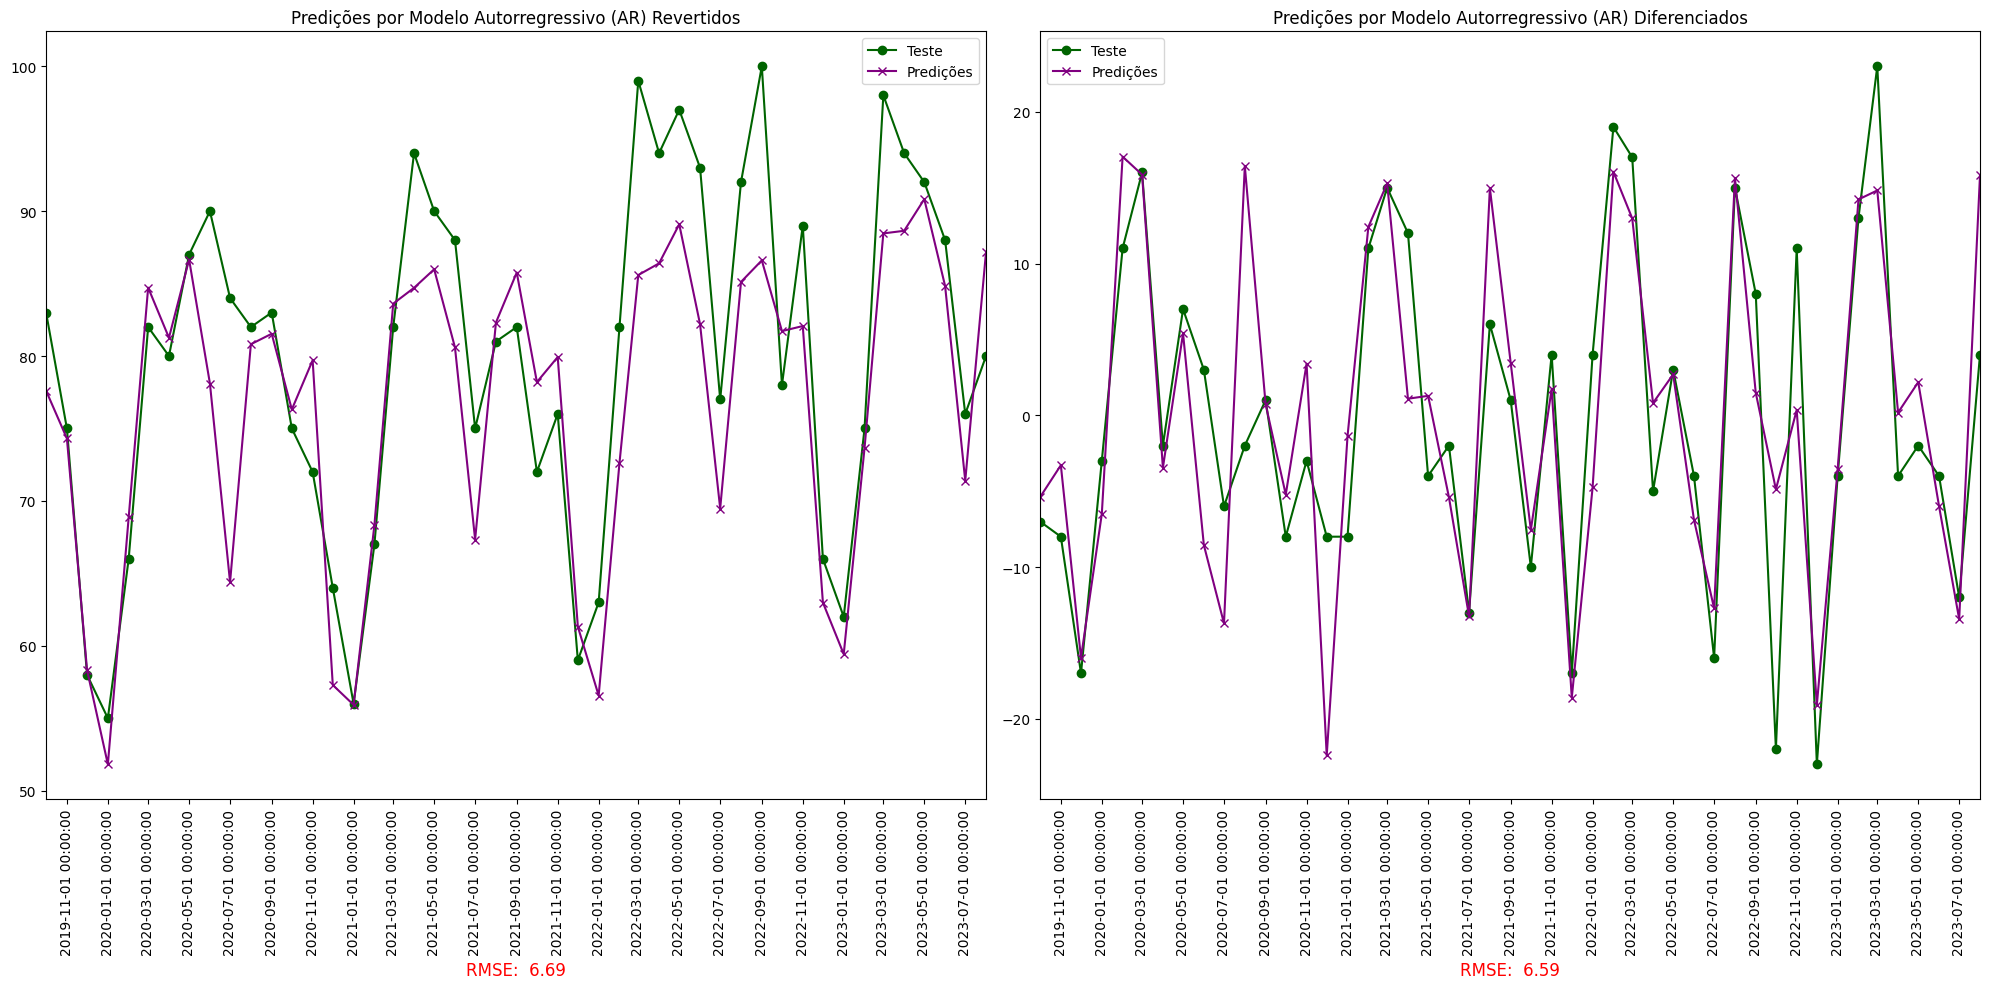

In [179]:
# Plotando os gráficos dos valores diferenciados e revertidos
import matplotlib.pyplot as plt

# Ajuste o tamanho conforme necessário
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1 - Valores Reais e Valores Preditos Revertidos
axs[0].plot(resultadoAr['Mês'], dadosRevertidosAr['Valores Reais'],
            label="Teste", color="darkgreen",marker='o')

axs[0].plot(resultadoAr['Mês'], dadosRevertidosAr['Valores Preditos'],
            label='Predições', color='purple',marker='x')

axs[0].set_xticks(df['Mês'][::2])
axs[0].set_xticklabels(df['Mês'][::2], rotation='vertical')
axs[0].set_xlim(resultadoAr['Mês'].iloc[0], resultadoAr['Mês'].iloc[-1])
axs[0].legend(loc='best')
axs[0].set_title("Predições por Modelo Autorregressivo (AR) Revertidos")
axs[0].set_xlabel(f"RMSE: {rmseRevertidoAr: .2f}",fontsize=12,color='red')
# Gráfico 2 - Valores Reais e Valores Preditos Diferenciados
axs[1].plot(resultadoAr['Mês'], teste['Diferenca'],
            label="Teste", color="darkgreen",marker='o')

axs[1].plot(resultadoAr['Mês'], resultadoAr['Predicões'],
            label='Predições', color='purple',marker='x')

axs[1].set_xticks(df['Mês'][::2])
axs[1].set_xticklabels(df['Mês'][::2], rotation='vertical')
axs[1].set_xlim(resultadoAr['Mês'].iloc[0], resultadoAr['Mês'].iloc[-1])
axs[1].legend(loc='best')
axs[1].set_title("Predições por Modelo Autorregressivo (AR) Diferenciados")
axs[1].set_xlabel(f"RMSE: {rmseAr: .2f}",fontsize=12,color='red')
plt.tight_layout()
plt.show()


In [180]:
# Modelo MA (Média Móvel)

from statsmodels.tsa.arima.model import ARIMA as arima
modeloMa =arima(endog = treino['Diferenca'],
                   order=(0,0,len(teste)))
# Hiperparâmetros
# endog: variável dependente, variável resposta ou y (endógena)
# order: ordem do modelo para os componentes autoregressivos, de diferenças
# e média móvel.

# A ordem do modelo é definida como (p, d, q):

# p: O número de termos autoregressivos (ordem do componente AR).
# d: O número de diferenças necessárias para tornar a série estacionária
# (ordem do componente I).

# q: O número de termos de média móvel (ordem do componente MA).
fitMa = modeloMa.fit()
print("Coeficientes: \n%s" % fitMa.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coeficientes: 
const      0.182440
ma.L1     -0.307364
ma.L2     -0.002442
ma.L3     -0.078191
ma.L4     -0.458012
ma.L5      0.160038
ma.L6      0.162173
ma.L7     -0.141540
ma.L8     -0.195813
ma.L9     -0.191801
ma.L10    -0.139225
ma.L11     0.127608
ma.L12     0.474737
ma.L13    -0.141304
ma.L14    -0.122074
ma.L15     0.094817
ma.L16    -0.604939
ma.L17     0.348983
ma.L18     0.089150
ma.L19    -0.048790
ma.L20    -0.217017
ma.L21    -0.110207
ma.L22    -0.255973
ma.L23     0.373373
ma.L24     0.314063
ma.L25    -0.259341
ma.L26    -0.132242
ma.L27     0.004249
ma.L28    -0.310072
ma.L29     0.450193
ma.L30    -0.055940
ma.L31    -0.200021
ma.L32     0.072149
ma.L33    -0.111588
ma.L34     0.037846
ma.L35     0.514423
ma.L36     0.504853
ma.L37    -0.341420
ma.L38    -0.102266
ma.L39    -0.112930
ma.L40    -0.341034
ma.L41     0.247405
ma.L42     0.180490
ma.L43    -0.380762
ma.L44     0.125333
ma.L45    -0.382176
ma.L46     0.254336
ma.L47     0.212892
sigma2    22.183123
dtype

In [181]:
# Predição
predicaoMa = fitMa.predict(start = len(treino),
                                 end=len(treino) + len(teste) - 1,
                                 dynamic = False)
# Quando dynamic é definido como True, as previsões são feitas usando um
# processo dinâmico, onde as previsões anteriores são usadas como entrada para
# prever observações futuras. Isso significa que à medida que você faz previsões
# para períodos futuros, as previsões anteriores são incorporadas ao processo de
# previsão.
predicaoMa.name = "Predições"
resultadoMa = pd.concat([teste,predicaoMa],
                           axis=1).reindex(teste.index)
print(resultadoMa)

           Mês  Geo: Brasil  Diferenca   Ano  Mês_do_Ano  Predições
141 2019-10-01           83       -7.0  2019          10  -0.566829
142 2019-11-01           75       -8.0  2019          11  -1.218935
143 2019-12-01           58      -17.0  2019          12 -13.308061
144 2020-01-01           55       -3.0  2020           1   1.984476
145 2020-02-01           66       11.0  2020           2  16.348339
146 2020-03-01           82       16.0  2020           3   0.532958
147 2020-04-01           80       -2.0  2020           4   4.801169
148 2020-05-01           87        7.0  2020           5  -3.908866
149 2020-06-01           90        3.0  2020           6  -6.193180
150 2020-07-01           84       -6.0  2020           7  -0.549234
151 2020-08-01           82       -2.0  2020           8   7.630161
152 2020-09-01           83        1.0  2020           9  -4.238913
153 2020-10-01           75       -8.0  2020          10  -3.578398
154 2020-11-01           72       -3.0  2020    

In [182]:
# Medindo o desempenho
rmseMa = sqrt(erroQuadratico(teste['Diferenca'],predicaoMa))
print("MA - Raiz Quadrada do Erro Médio (RMSE): %.3f" % rmseMa)

MA - Raiz Quadrada do Erro Médio (RMSE): 10.127


Text(0.5, 1.0, 'Predições por Média Móvel (MA)')

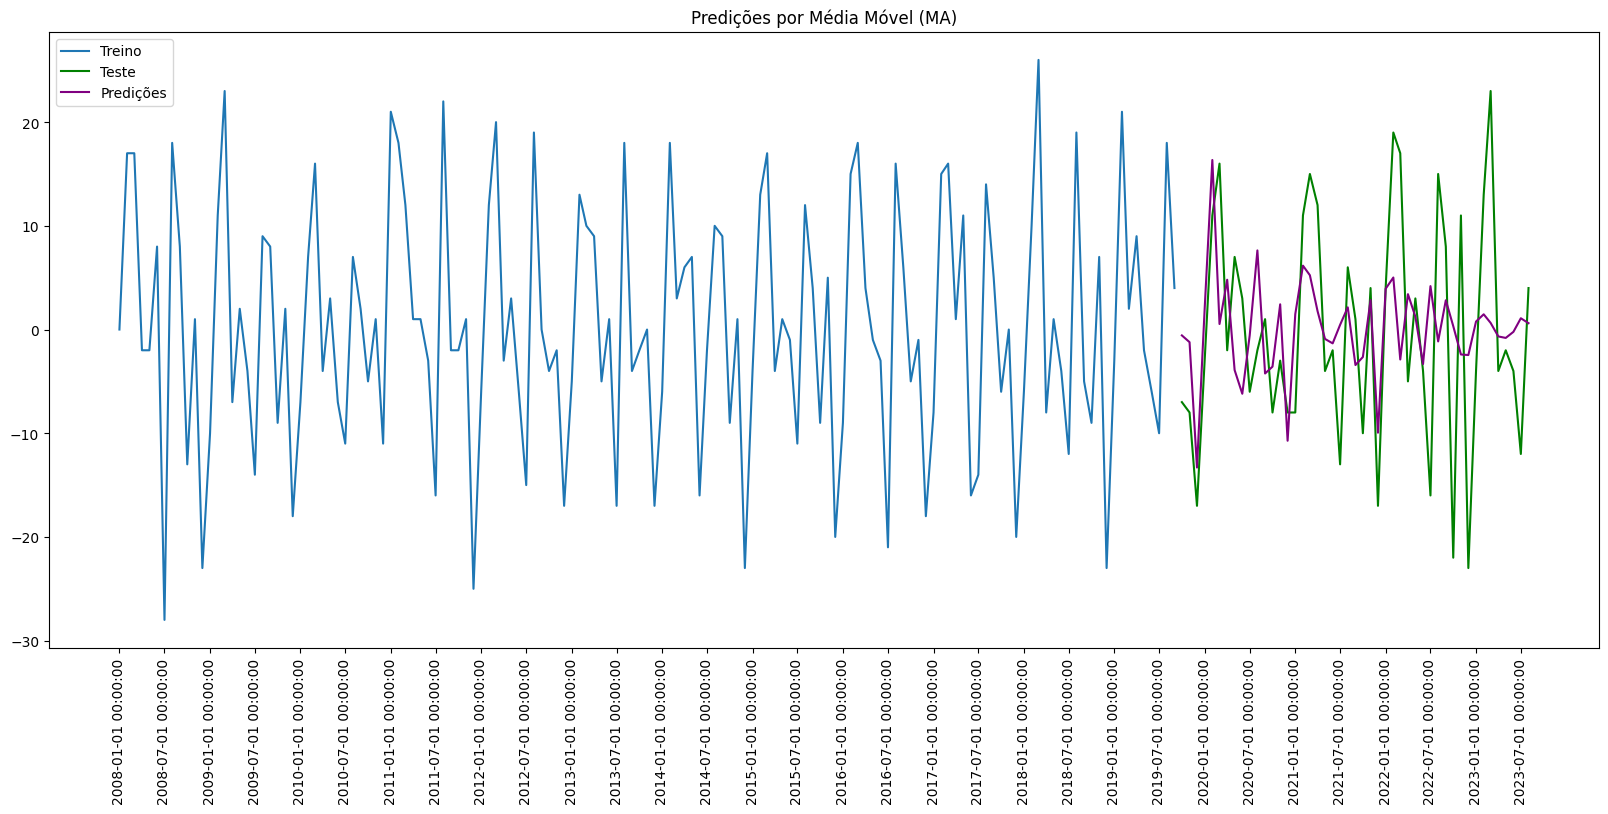

In [184]:
#Plotando as previsões
plt.figure(figsize=(20,8))
plt.plot(treino['Mês'],treino['Diferenca'],label="Treino")
plt.plot(teste['Mês'],teste['Diferenca'],label="Teste",color="green")
plt.plot(resultadoMa['Mês'],resultadoMa['Predições'],
         label='Predições',color="purple")
plt.xticks(df['Mês'][::6],df['Mês'][::6],rotation='vertical')
plt.legend(loc='best')
plt.title("Predições por Média Móvel (MA)")

Text(0.5, 1.0, 'Predições por Média Móvel (MA)')

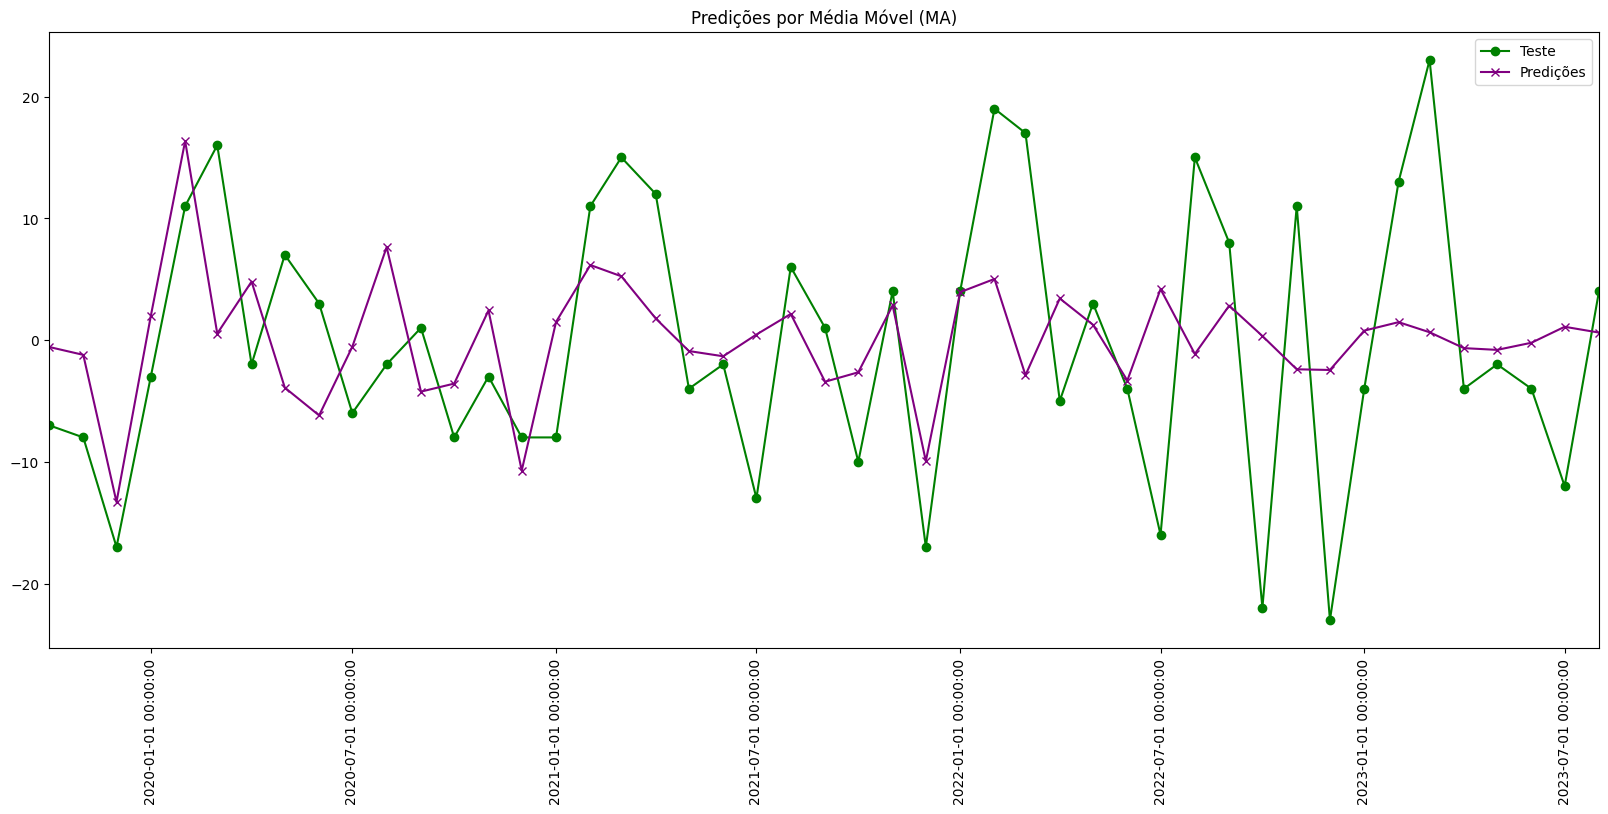

In [185]:
# Plotando as previsões (MA)
plt.figure(figsize=(20,8))
plt.plot(teste['Mês'],teste['Diferenca'],
         label="Teste",color="green",marker='o')
plt.plot(resultadoMa['Mês'],resultadoMa['Predições'],
         label='Predições',color="purple",marker='x')
plt.xticks(df['Mês'][::6],df['Mês'][::6],rotation='vertical')

# Definir os limites dos eixos x apenas a parte de teste e predições
# iloc[0]: Acessa o primeiro elemento do DataFrame.
# iloc[-1]: Acessa o último elemento do DataFrame.

plt.xlim(teste['Mês'].iloc[0], resultadoMa['Mês'].iloc[-1])
plt.legend(loc='best')
plt.title("Predições por Média Móvel (MA)")

In [187]:
# Revertendo valores Diferenciados do modelo (MA) - Média Móvel

predicaoRevertidaMa = resultadoMa['Predições']
testeMa = teste['Geo: Brasil']

# Usando a função criada acima "reversaoDiferenca"
dadosRevertidosMa = reversaoDiferenca(predicaoRevertidaMa,
                                      testeMa,
                                      primeiroValorTeste)
print(dadosRevertidosMa)


     Valores Reais  Valores Preditos
141             83         82.433171
142             75         81.214236
143             58         67.906176
144             55         69.890652
145             66         86.238991
146             82         86.771948
147             80         91.573117
148             87         87.664251
149             90         81.471071
150             84         80.921837
151             82         88.551999
152             83         84.313085
153             75         80.734688
154             72         83.166226
155             64         72.442724
156             56         73.928471
157             67         80.088472
158             82         85.324141
159             94         87.096426
160             90         86.191159
161             88         84.856859
162             75         85.309871
163             81         87.451103
164             82         84.026038
165             72         81.375584
166             76         84.215736
1

In [188]:
# Medindo o desempenho dados revertidos
from sklearn.metrics import mean_squared_error as erroQuadratico
from math import sqrt
rmseRevertidoMa = sqrt(erroQuadratico(
    dadosRevertidosMa['Valores Reais'],
    dadosRevertidosMa['Valores Preditos']))
print("MA - Raiz Quadrada do Erro Médio (RMSE): %.3f" % rmseRevertidoMa)

MA - Raiz Quadrada do Erro Médio (RMSE): 10.354


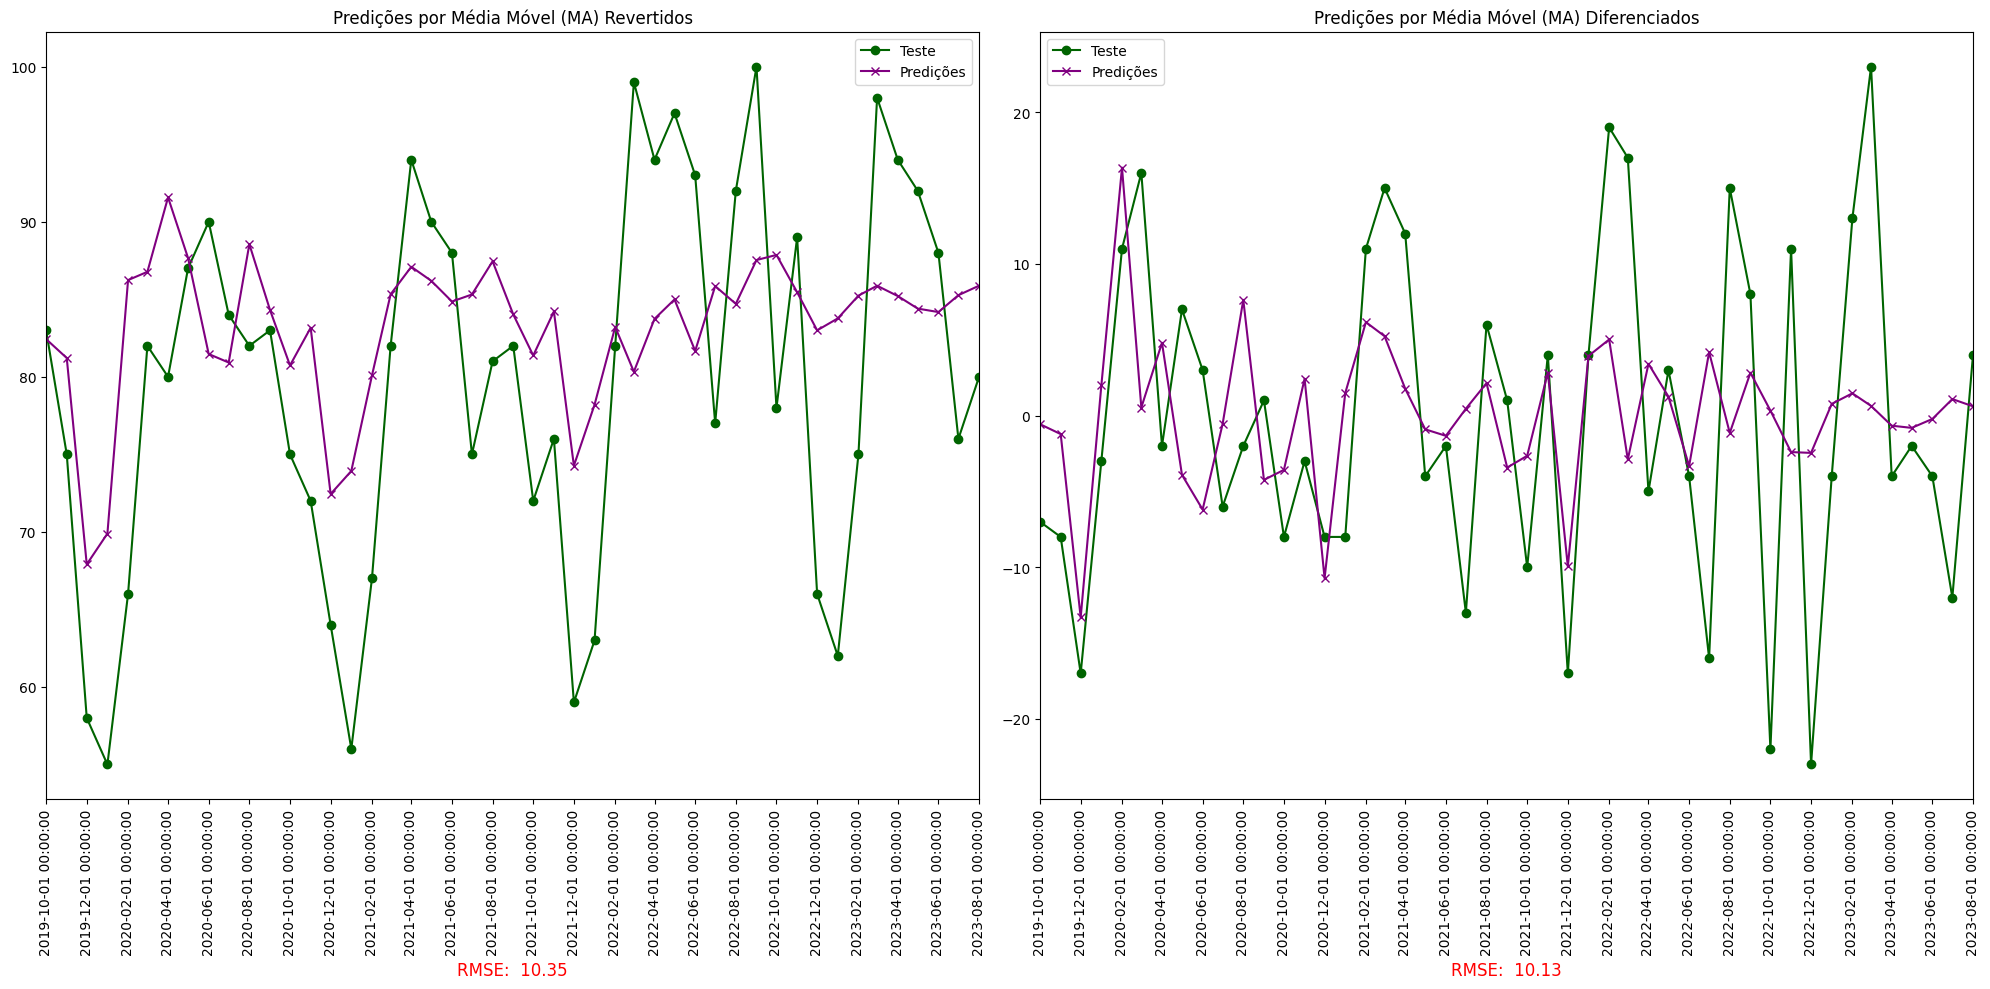

In [189]:
# Plotando os gráficos dos valores diferenciados e revertidos
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1 - Valores Reais e Valores Preditos Revertidos
axs[0].plot(resultadoMa['Mês'], dadosRevertidosMa['Valores Reais'],
            label="Teste", color="darkgreen",marker='o')

axs[0].plot(resultadoMa['Mês'], dadosRevertidosMa['Valores Preditos'],
            label='Predições', color='purple',marker='x')

axs[0].set_xticks(resultadoMa['Mês'][::2])
axs[0].set_xticklabels(resultadoMa['Mês'][::2], rotation='vertical')
axs[0].set_xlim(resultadoMa['Mês'].iloc[0], resultadoMa['Mês'].iloc[-1])
axs[0].legend(loc='best')
axs[0].set_title("Predições por Média Móvel (MA) Revertidos")
axs[0].set_xlabel(f"RMSE: {rmseRevertidoMa: .2f}",fontsize=12,color='red')

# Gráfico 2 - Valores Reais e Valores Preditos Diferenciados
axs[1].plot(resultadoMa['Mês'], teste['Diferenca'],
            label="Teste", color="darkgreen",marker='o')

axs[1].plot(resultadoMa['Mês'], resultadoMa['Predições'],
            label='Predições', color='purple',marker='x')

axs[1].set_xticks(resultadoMa['Mês'][::2])
axs[1].set_xticklabels(resultadoMa['Mês'][::2], rotation='vertical')
axs[1].set_xlim(resultadoMa['Mês'].iloc[0], resultadoMa['Mês'].iloc[-1])
axs[1].legend(loc='best')
axs[1].set_title("Predições por Média Móvel (MA) Diferenciados")
axs[1].set_xlabel(f"RMSE: {rmseMa: .2f}",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [190]:
#Média Móvel AutoRegressiva (ARMA)
modeloArma = arima(endog = treino['Diferenca'],
                   order = (12,1,12))
# endog: variável dependente, variável resposta ou y (endógena)
# order: ordem do modelo para os componentes autoregressivos,
# de diferenças e média móvel.

# A ordem do modelo é definida como (p, d, q):

# p: O número de termos autoregressivos (ordem do componente AR).
# d: O número de diferenças necessárias para tornar a série estacionária
# (ordem do componente I).

# q: O número de termos de média móvel (ordem do componente MA).
fitArma = modeloArma.fit()
print("Coeficientes: \n%s" % fitArma.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coeficientes: 
ar.L1     -1.497140
ar.L2     -1.589215
ar.L3     -1.268893
ar.L4     -1.326046
ar.L5     -1.471046
ar.L6     -1.561578
ar.L7     -1.257611
ar.L8     -1.322818
ar.L9     -1.473288
ar.L10    -1.602921
ar.L11    -1.266916
ar.L12    -0.361709
ma.L1      0.075242
ma.L2     -0.056607
ma.L3     -0.216597
ma.L4      0.026859
ma.L5      0.071718
ma.L6      0.036563
ma.L7     -0.202847
ma.L8      0.123291
ma.L9      0.166865
ma.L10     0.045680
ma.L11    -0.369100
ma.L12    -0.698348
sigma2    41.115495
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [191]:
# Predição
predicaoArma = fitArma.predict(start = len(treino),
                               end = len(treino)+len(teste) - 1,
                               dynamic = False)
predicaoArma.name = "Predições"
resultadoArma = pd.concat([teste, predicaoArma],
                          axis=1).reindex(teste.index)
print(resultadoArma)

           Mês  Geo: Brasil  Diferenca   Ano  Mês_do_Ano  Predições
141 2019-10-01           83       -7.0  2019          10  -7.192760
142 2019-11-01           75       -8.0  2019          11   1.678766
143 2019-12-01           58      -17.0  2019          12 -18.817960
144 2020-01-01           55       -3.0  2020           1  -6.285363
145 2020-02-01           66       11.0  2020           2  14.983979
146 2020-03-01           82       16.0  2020           3  10.600579
147 2020-04-01           80       -2.0  2020           4   4.273602
148 2020-05-01           87        7.0  2020           5   3.962704
149 2020-06-01           90        3.0  2020           6  -9.940424
150 2020-07-01           84       -6.0  2020           7 -10.121416
151 2020-08-01           82       -2.0  2020           8  14.529427
152 2020-09-01           83        1.0  2020           9   3.236453
153 2020-10-01           75       -8.0  2020          10  -5.451895
154 2020-11-01           72       -3.0  2020    

In [192]:
# Medindo Desempenho
rmseArma = sqrt(erroQuadratico(teste['Diferenca'],predicaoArma))
print("ARMA - Raiz Quadrada do Erro Médio (RMSE): %.3f" % rmseArma)

ARMA - Raiz Quadrada do Erro Médio (RMSE): 7.329


Text(0.5, 1.0, 'Predições porMédia Móvel Autorregressiva (ARMA)')

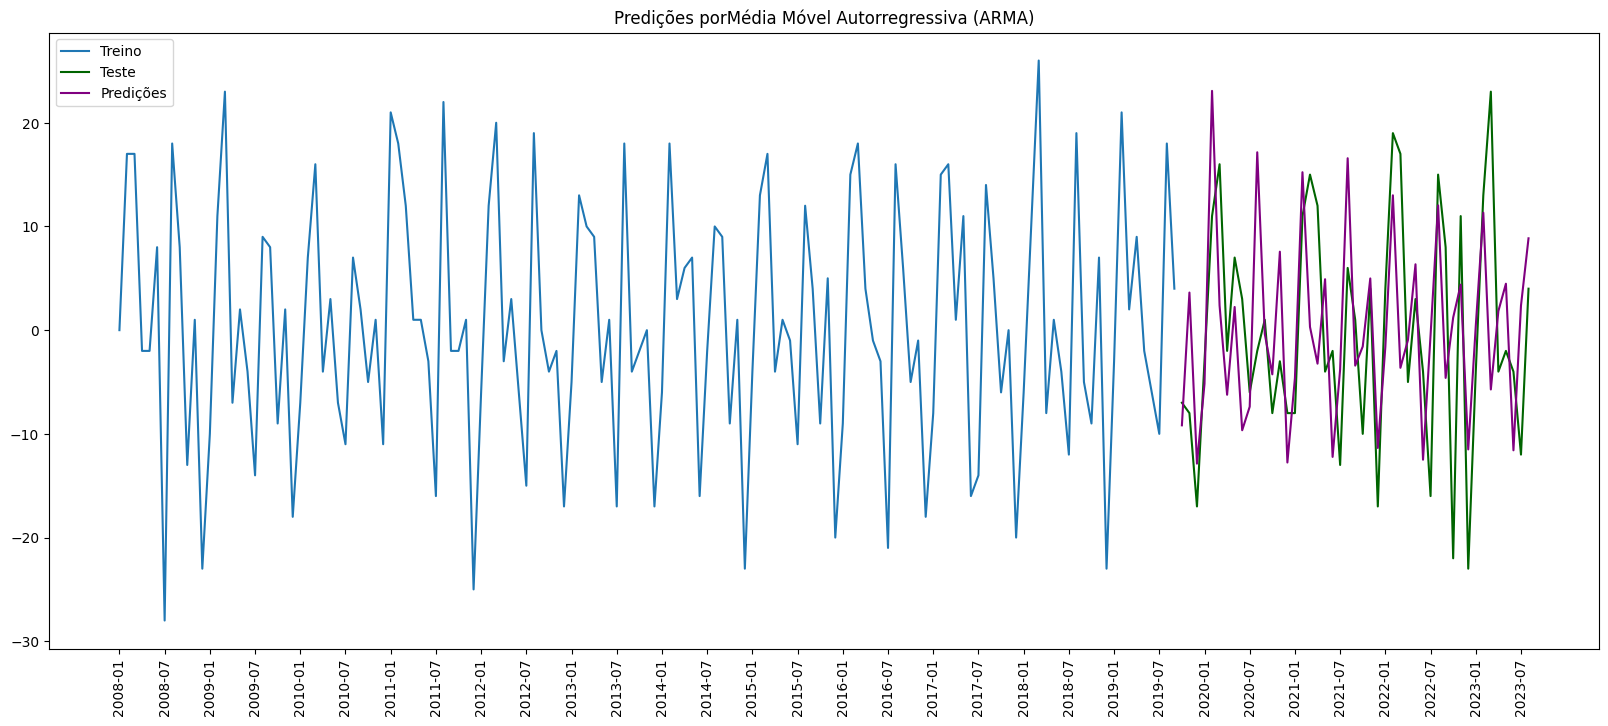

In [34]:
# Plotando as previsões
plt.figure(figsize=(20,8))
plt.plot(treino['Mês'],treino['Diferenca'],label="Treino")
plt.plot(teste['Mês'],teste['Diferenca'],label="Teste",color="darkgreen")
plt.plot(resultadoArma['Mês'],resultadoArma['Predições'],
         label='Predições',color='purple')

plt.xticks(df['Mês'][::6],df['Mês'][::6],rotation='vertical')
plt.legend(loc='best')
plt.title("Predições porMédia Móvel Autorregressiva (ARMA)")

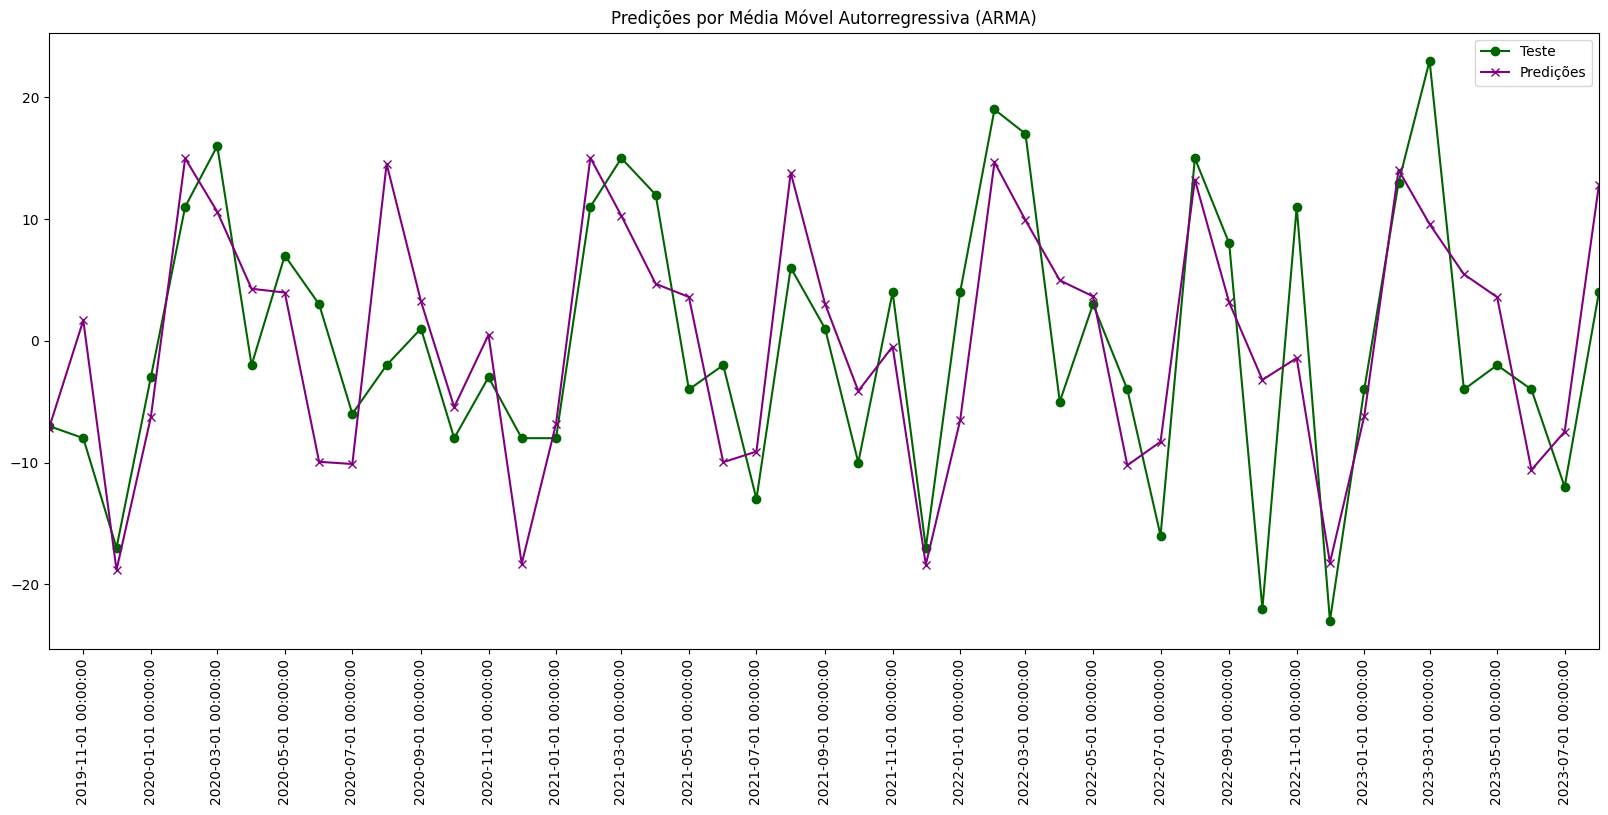

In [194]:
#Plotando as previsões (ARMA)
plt.figure(figsize=(20, 8))

plt.plot(teste['Mês'], teste['Diferenca'],
         label="Teste", color="darkgreen",marker='o')

plt.plot(resultadoArma['Mês'], resultadoArma['Predições'],
         label='Predições', color='purple',marker='x')

plt.xticks(df['Mês'][::2], df['Mês'][::2], rotation='vertical')

plt.xlim(teste['Mês'].iloc[0], resultadoArma['Mês'].iloc[-1])

plt.legend(loc='best')
plt.title("Predições por Média Móvel Autorregressiva (ARMA)")

plt.show()


In [195]:
# Revertendo valores Diferenciados

predicaoRevertidaArma = resultadoArma['Predições']
testeArma = teste['Geo: Brasil']
# Usando a função "reversaoDiferenca" para reverter dados usando o cumsum(),
dadosRevertidosArma = reversaoDiferenca(predicaoRevertidaArma,
                                        testeArma,
                                        primeiroValorTeste)
print(dadosRevertidosArma)

     Valores Reais  Valores Preditos
141             83         75.807240
142             75         77.486006
143             58         58.668046
144             55         52.382683
145             66         67.366662
146             82         77.967242
147             80         82.240844
148             87         86.203548
149             90         76.263123
150             84         66.141707
151             82         80.671134
152             83         83.907588
153             75         78.455693
154             72         78.946177
155             64         60.627679
156             56         53.808914
157             67         68.842827
158             82         79.108386
159             94         83.788184
160             90         87.384062
161             88         77.410146
162             75         68.312270
163             81         82.121706
164             82         85.146334
165             72         81.023047
166             76         80.550286
1

In [198]:
# Medindo o desempenho dados revertidos
rmseRevertidoArma = sqrt(erroQuadratico(
    dadosRevertidosArma['Valores Reais'],
    dadosRevertidosArma['Valores Preditos']))
print("ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: %.3f"
 % rmseRevertidoArma)

ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: 7.765


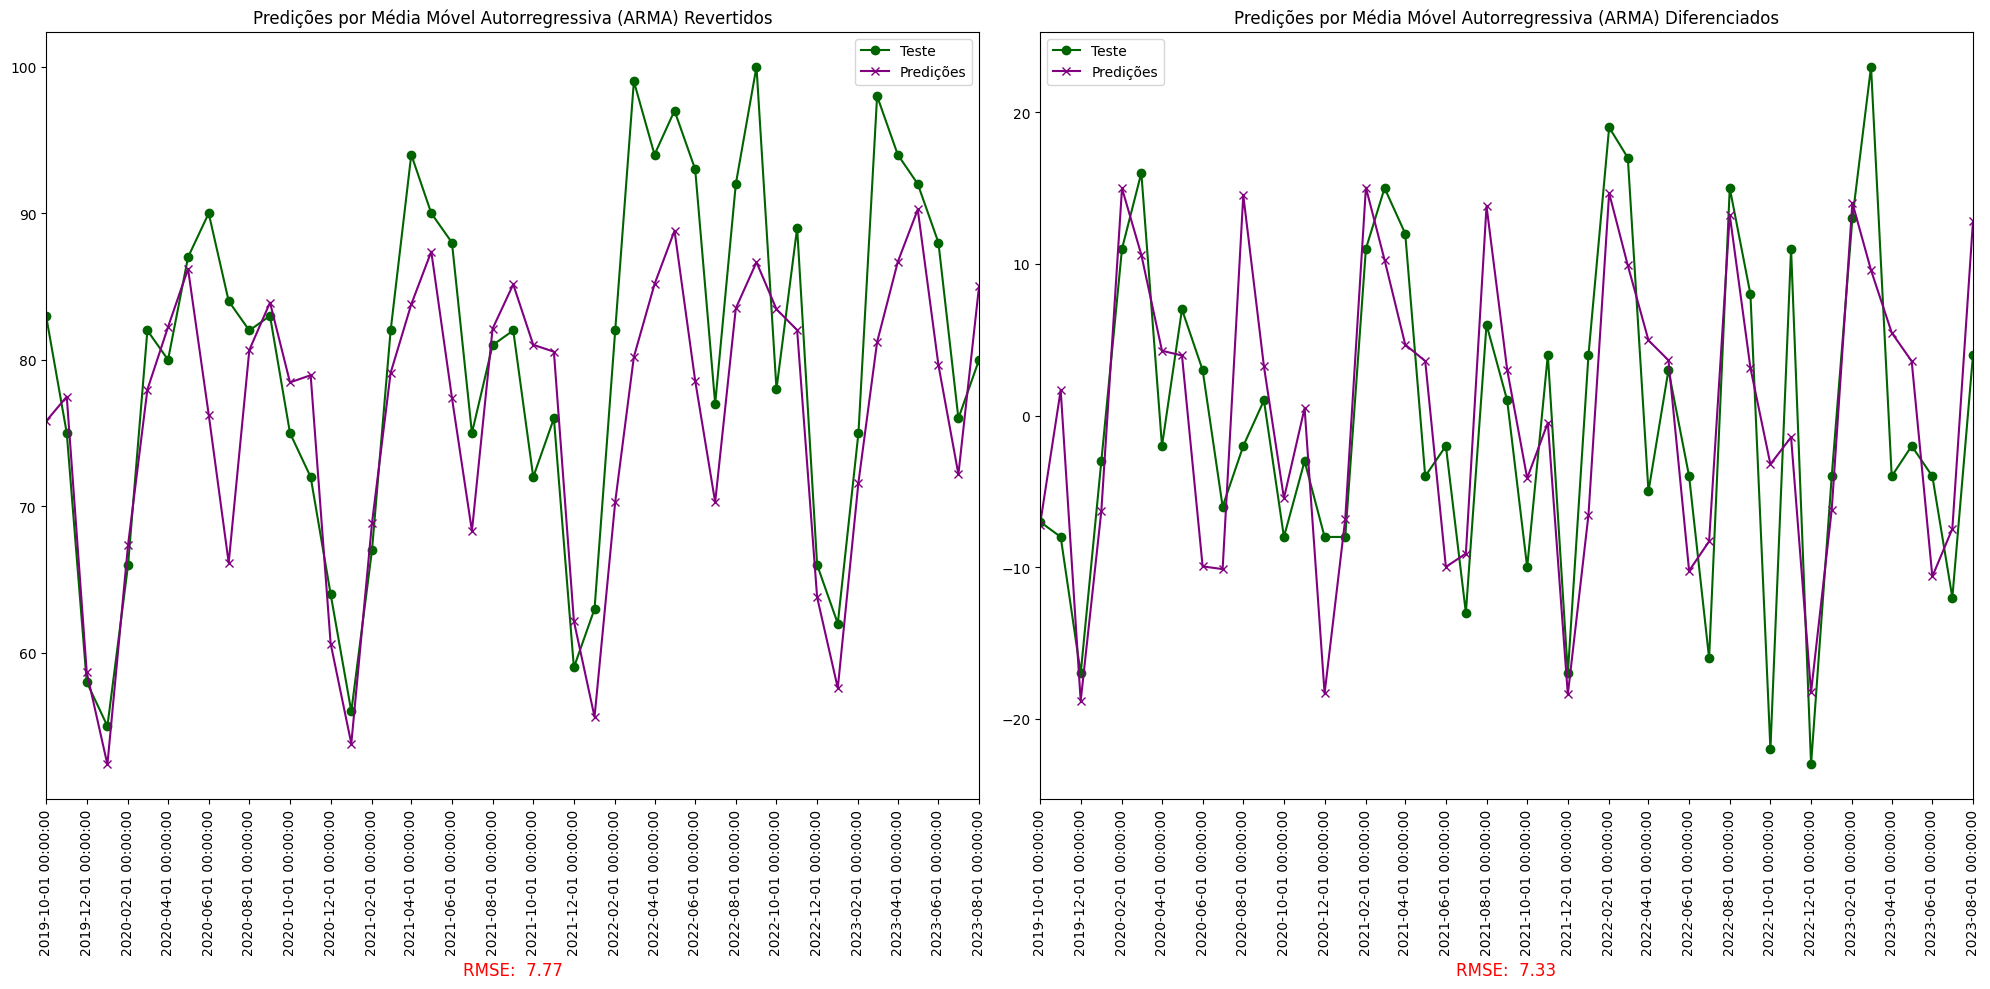

In [199]:
# Plotando os gráficos dos valores diferenciados e revertidos
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1 - Valores Reais e Valores Preditos Revertidos
axs[0].plot(resultadoArma['Mês'], dadosRevertidosArma['Valores Reais'],
            label="Teste", color="darkgreen",marker='o')

axs[0].plot(resultadoArma['Mês'], dadosRevertidosArma['Valores Preditos'],
            label='Predições', color='purple',marker='x')

axs[0].set_xticks(resultadoArma['Mês'][::2])
axs[0].set_xticklabels(resultadoArma['Mês'][::2], rotation='vertical')
axs[0].set_xlim(resultadoArma['Mês'].iloc[0], resultadoArma['Mês'].iloc[-1])
axs[0].legend(loc='best')
axs[0].set_title("Predições por Média Móvel Autorregressiva (ARMA) Revertidos")
axs[0].set_xlabel(f"RMSE: {rmseRevertidoArma: .2f}",fontsize=12,color='red')

# Gráfico 2 - Valores Reais e Valores Preditos Diferenciados
axs[1].plot(resultadoArma['Mês'], teste['Diferenca'],
            label="Teste", color="darkgreen",marker='o')

axs[1].plot(resultadoArma['Mês'], resultadoArma['Predições'],
            label='Predições', color='purple',marker='x')

axs[1].set_xticks(resultadoArma['Mês'][::2])
axs[1].set_xticklabels(resultadoArma['Mês'][::2], rotation='vertical')
axs[1].set_xlim(resultadoArma['Mês'].iloc[0], resultadoArma['Mês'].iloc[-1])
axs[1].legend(loc='best')
axs[1].set_title(
    "Predições por Média Móvel Autorregressiva (ARMA) Diferenciados")
axs[1].set_xlabel(f"RMSE: {rmseArma: .2f}",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [200]:
# Média Móvel Integrada AutoRegressiva (ARIMA)
modeloArima = arima(endog=treino['Diferenca'],
                    order = (12,1,12))
fitArima = modeloArima.fit()
print("Coeficientes: \n%s" % fitArima.params)
# p: O número de termos autoregressivos (ordem do componente AR).
# d: O número de diferenças necessárias para tornar a série estacionária
# (ordem do componente I).

# q: O número de termos de média móvel (ordem do componente MA).

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coeficientes: 
ar.L1     -1.497140
ar.L2     -1.589215
ar.L3     -1.268893
ar.L4     -1.326046
ar.L5     -1.471046
ar.L6     -1.561578
ar.L7     -1.257611
ar.L8     -1.322818
ar.L9     -1.473288
ar.L10    -1.602921
ar.L11    -1.266916
ar.L12    -0.361709
ma.L1      0.075242
ma.L2     -0.056607
ma.L3     -0.216597
ma.L4      0.026859
ma.L5      0.071718
ma.L6      0.036563
ma.L7     -0.202847
ma.L8      0.123291
ma.L9      0.166865
ma.L10     0.045680
ma.L11    -0.369100
ma.L12    -0.698348
sigma2    41.115495
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [201]:
# Predições
predicaoArima = fitArima.predict(start= len(treino),
                                 end = len(treino) + len(teste) - 1,
                                 dynamic = False)
predicaoArima.name = "Predições"
resultadoArima = pd.concat([teste, predicaoArima],axis=1).reindex(teste.index)
print(resultadoArima)

           Mês  Geo: Brasil  Diferenca   Ano  Mês_do_Ano  Predições
141 2019-10-01           83       -7.0  2019          10  -7.192760
142 2019-11-01           75       -8.0  2019          11   1.678766
143 2019-12-01           58      -17.0  2019          12 -18.817960
144 2020-01-01           55       -3.0  2020           1  -6.285363
145 2020-02-01           66       11.0  2020           2  14.983979
146 2020-03-01           82       16.0  2020           3  10.600579
147 2020-04-01           80       -2.0  2020           4   4.273602
148 2020-05-01           87        7.0  2020           5   3.962704
149 2020-06-01           90        3.0  2020           6  -9.940424
150 2020-07-01           84       -6.0  2020           7 -10.121416
151 2020-08-01           82       -2.0  2020           8  14.529427
152 2020-09-01           83        1.0  2020           9   3.236453
153 2020-10-01           75       -8.0  2020          10  -5.451895
154 2020-11-01           72       -3.0  2020    

In [202]:
# Medindo o desempenho
rmseArima = sqrt(erroQuadratico(teste['Diferenca'],resultadoArima['Predições']))
print("ARIMA -  Raiz Quadrada do Erro Médio (RMSE): {:.3F}".format(rmseArima))

ARIMA -  Raiz Quadrada do Erro Médio (RMSE): 7.329


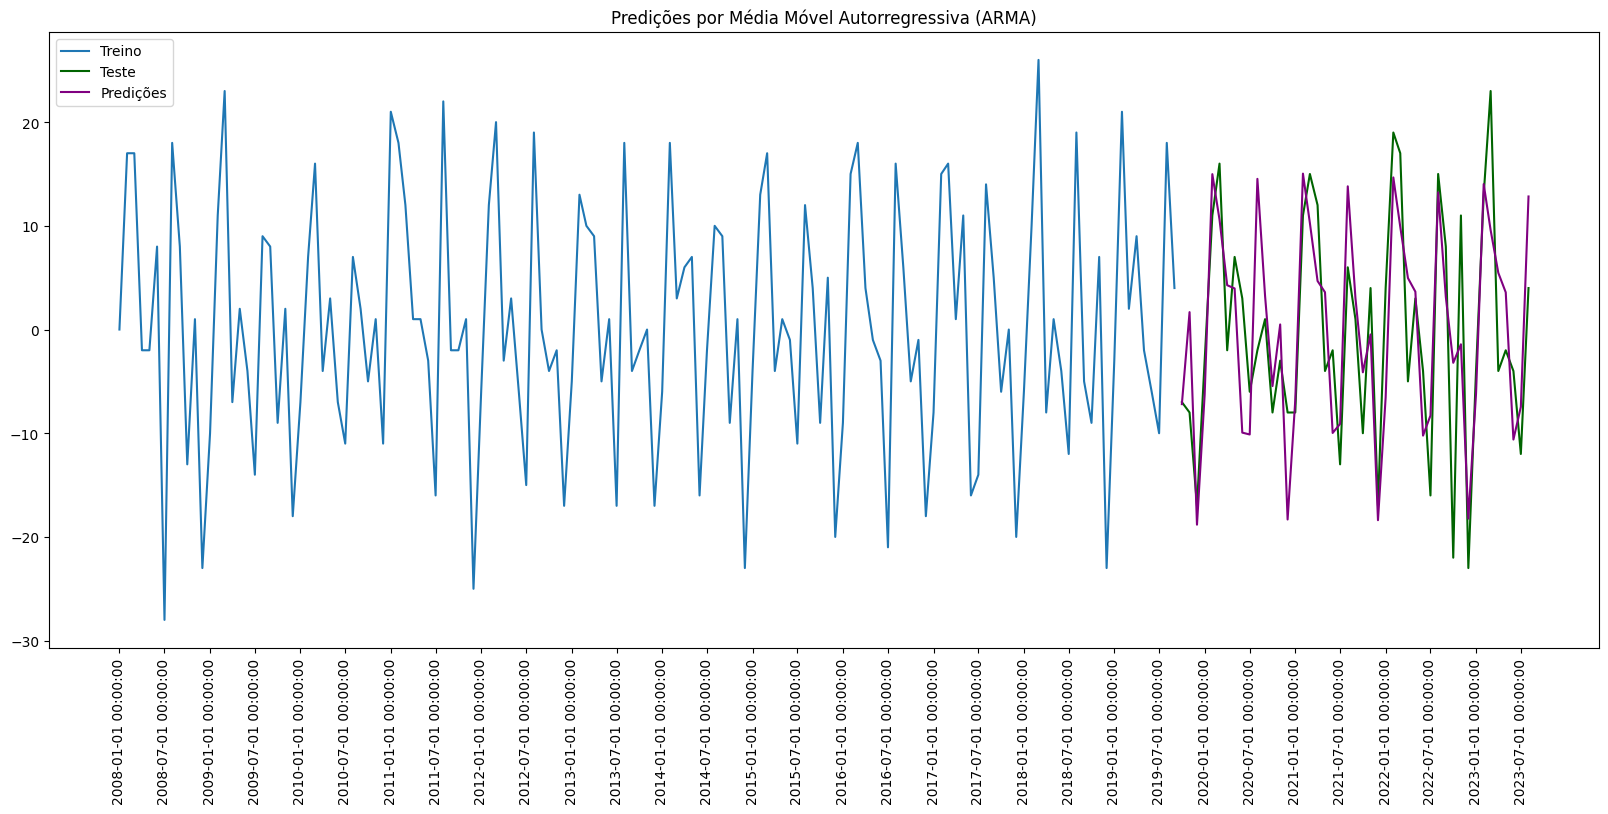

In [203]:
plt.figure(figsize=(20, 8))
plt.plot(treino['Mês'],treino['Diferenca'],label="Treino")
plt.plot(teste['Mês'], teste['Diferenca'], label="Teste", color="darkgreen")
plt.plot(resultadoArima['Mês'], resultadoArima['Predições'],
         label='Predições', color='purple')

plt.xticks(df['Mês'][::6], df['Mês'][::6], rotation='vertical')
plt.legend(loc='best')
plt.title("Predições por Média Móvel Autorregressiva (ARMA)")

plt.show()

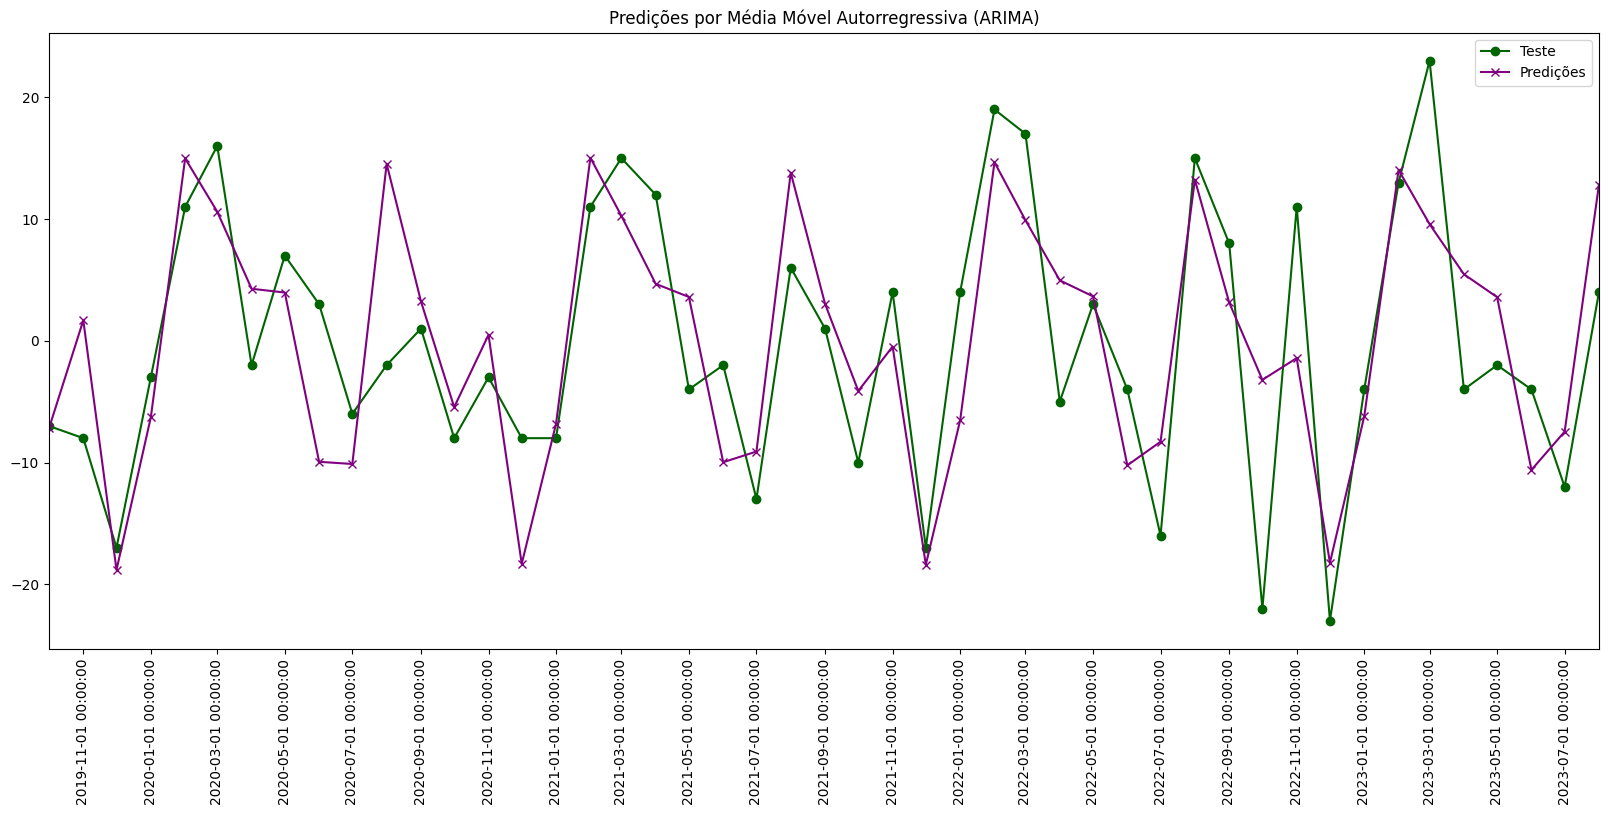

In [204]:
# Plotando Previsões (ARIMA)
plt.figure(figsize=(20, 8))

plt.plot(teste['Mês'], teste['Diferenca'],
         label="Teste", color="darkgreen",marker='o')

plt.plot(resultadoArima['Mês'], resultadoArima['Predições'],
         label='Predições', color='purple',marker='x')
plt.xticks(df['Mês'][::2], df['Mês'][::2], rotation='vertical')

plt.xlim(teste['Mês'].iloc[0], resultadoArima['Mês'].iloc[-1])

plt.legend(loc='best')
plt.title("Predições por Média Móvel Autorregressiva (ARIMA)")

plt.show()

In [205]:
# Revertendo valores Diferenciados

predicaoRevertidaArima = resultadoArima['Predições']
testeArima = teste['Geo: Brasil']
# Usando a função para reverter os dados com o método cumsum().
dadosRevertidosArima = reversaoDiferenca(predicaoRevertidaArima,
                                         testeArima,
                                         primeiroValorTeste)
print(dadosRevertidosArima)

     Valores Reais  Valores Preditos
141             83         75.807240
142             75         77.486006
143             58         58.668046
144             55         52.382683
145             66         67.366662
146             82         77.967242
147             80         82.240844
148             87         86.203548
149             90         76.263123
150             84         66.141707
151             82         80.671134
152             83         83.907588
153             75         78.455693
154             72         78.946177
155             64         60.627679
156             56         53.808914
157             67         68.842827
158             82         79.108386
159             94         83.788184
160             90         87.384062
161             88         77.410146
162             75         68.312270
163             81         82.121706
164             82         85.146334
165             72         81.023047
166             76         80.550286
1

In [206]:
#Medindo o desempenho dados revertidos
from sklearn.metrics import mean_squared_error as erroQuadratico
from math import sqrt
rmseRevertidoArima = sqrt(erroQuadratico(
    dadosRevertidosArima['Valores Reais'],
    dadosRevertidosArima['Valores Preditos']))
print("ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: %.3f"
 % rmseRevertidoArima)



ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: 7.765


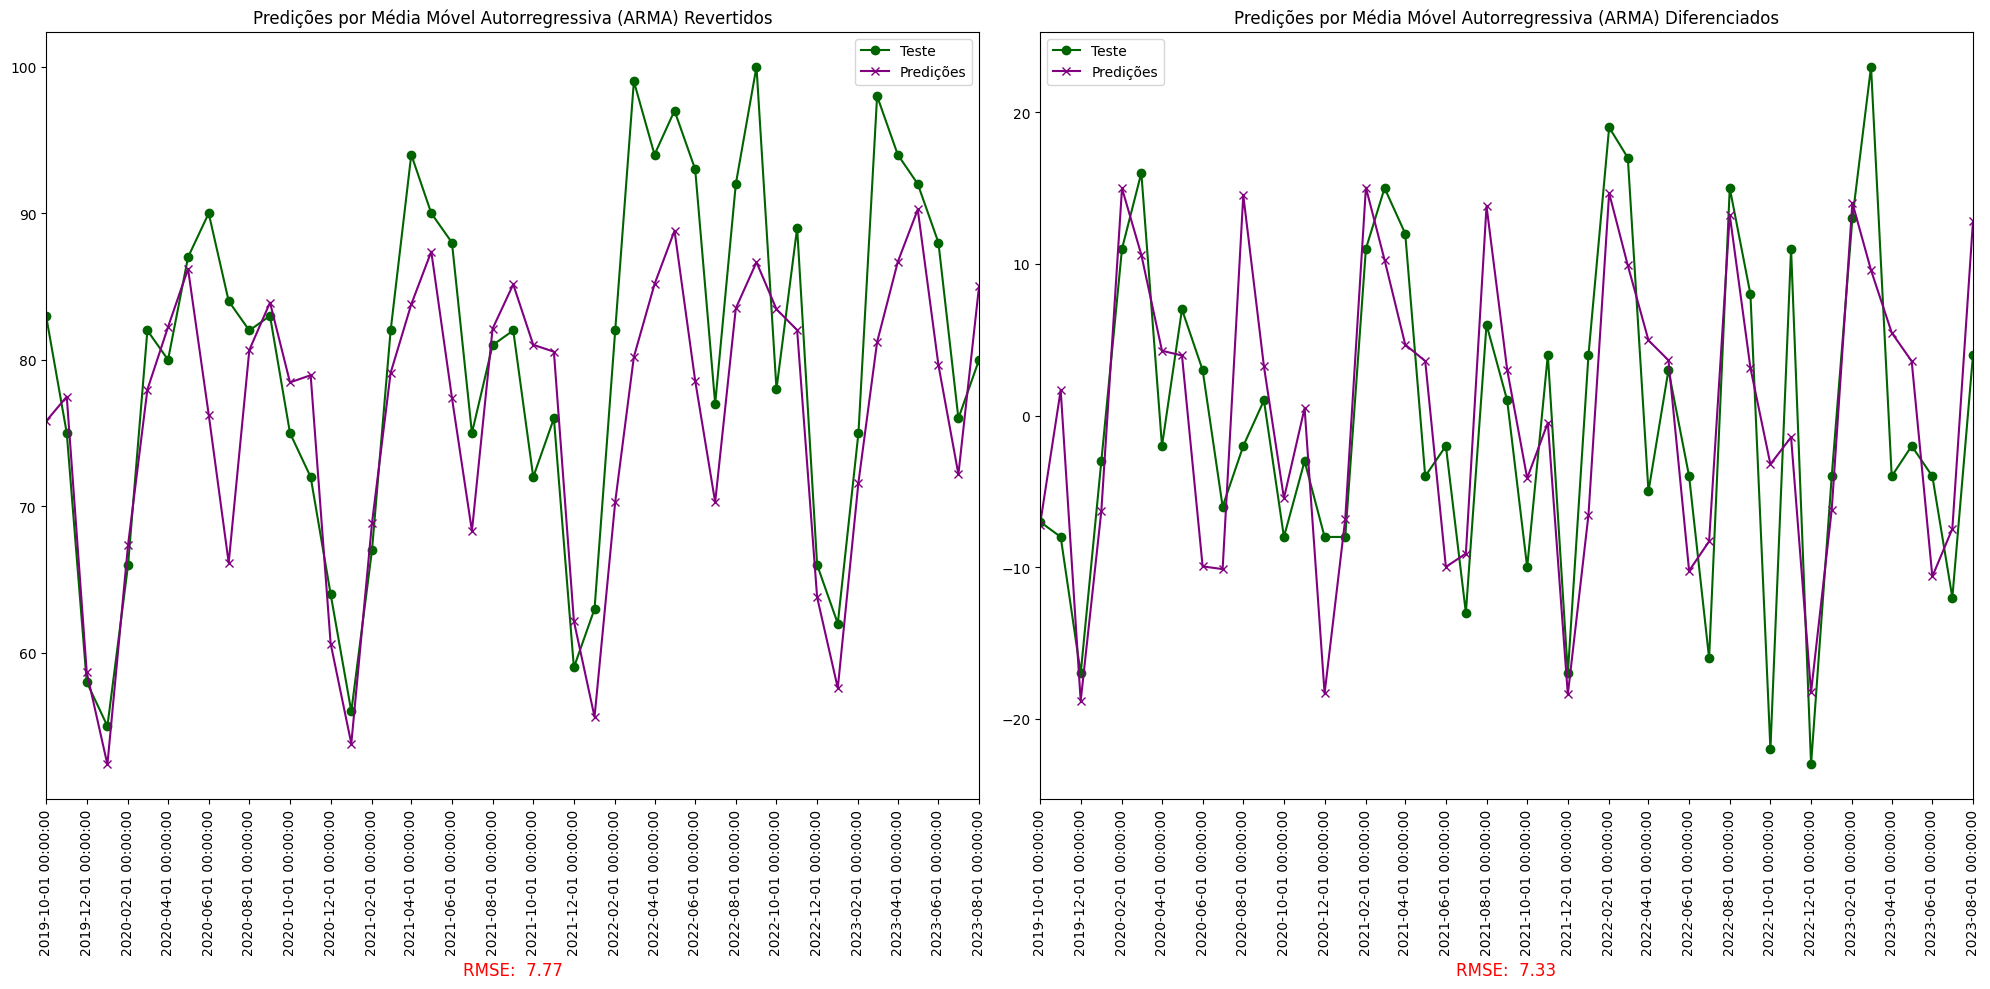

In [207]:

# Plotando os gráficos dos valores diferenciados e revertidos
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1 - Valores Reais e Valores Preditos Revertidos
axs[0].plot(resultadoArima['Mês'], dadosRevertidosArima['Valores Reais'],
            label="Teste", color="darkgreen",marker='o')

axs[0].plot(resultadoArima['Mês'], dadosRevertidosArima['Valores Preditos'],
            label='Predições', color='purple',marker='x')

axs[0].set_xticks(resultadoArima['Mês'][::2])
axs[0].set_xticklabels(resultadoArima['Mês'][::2], rotation='vertical')
axs[0].set_xlim(resultadoArima['Mês'].iloc[0], resultadoArima['Mês'].iloc[-1])
axs[0].legend(loc='best')
axs[0].set_title("Predições por Média Móvel Autorregressiva (ARMA) Revertidos")
axs[0].set_xlabel(f"RMSE: {rmseRevertidoArima: .2f}",fontsize=12,color='red')

# Gráfico 2 - Valores Reais e Valores Preditos Diferenciados
axs[1].plot(resultadoArima['Mês'], resultadoArima['Diferenca'],
            label="Teste", color="darkgreen",marker='o')

axs[1].plot(resultadoArima['Mês'], resultadoArima['Predições'],
            label='Predições', color='purple',marker='x')

axs[1].set_xticks(resultadoArima['Mês'][::2])
axs[1].set_xticklabels(resultadoArima['Mês'][::2], rotation='vertical')
axs[1].set_xlim(resultadoArima['Mês'].iloc[0], resultadoArima['Mês'].iloc[-1])
axs[1].legend(loc='best')
axs[1].set_title(
    "Predições por Média Móvel Autorregressiva (ARMA) Diferenciados")
axs[1].set_xlabel(f"RMSE: {rmseArima: .2f}",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [47]:
#Média Móvel Integrada AutoRegressiva Sazonal (SARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX as sarimax
modeloSarima = sarimax(endog = treino['Diferenca'],
                       order = (12,1,12),
                       seasonal_order=(0, 1, 0, 12))

# seasonal_order: (P, D, Q, s)

# P (ordem sazonal AR): Número de lags passados da componente sazonal a serem
# incluídos no modelo autoregressivo sazonal.

# D (ordem sazonal de diferenciação): Número de vezes que a série sazonal será
# diferenciada para torná-la estacionária.

# Q (ordem sazonal MA): Número de lags dos erros sazonais passados a serem
# incluídos no modelo de média móvel sazonal.

# s (período sazonal): Número de períodos em uma temporada
# (por exemplo, 12 para dados mensais com sazonalidade anual).

fitSarima = modeloSarima.fit()
print("Coeficientes: \n%s" % fitSarima.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coeficientes: 
ar.L1     -0.796220
ar.L2     -0.563989
ar.L3     -0.702833
ar.L4     -0.605065
ar.L5     -0.437031
ar.L6     -0.388999
ar.L7     -0.319084
ar.L8     -0.264767
ar.L9     -0.313847
ar.L10    -0.117531
ar.L11    -0.346971
ar.L12    -0.475718
ma.L1     -0.461724
ma.L2      0.056394
ma.L3      0.274043
ma.L4     -0.260846
ma.L5     -0.066784
ma.L6      0.280062
ma.L7     -0.175504
ma.L8     -0.088852
ma.L9      0.282528
ma.L10    -0.249067
ma.L11     0.153647
ma.L12    -0.718578
sigma2    24.863790
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [213]:
# Predição Sarima
predicaoSarima = fitSarima.predict(start = len(treino),
                                   end = len(treino)+ len(teste)-1,
                                   dynamic = False)
predicaoSarima.name = "Predição"
resultadoSarima = pd.concat([teste,predicaoSarima],axis=1)
print(resultadoSarima)

           Mês  Geo: Brasil  Diferenca   Ano  Mês_do_Ano   Predição
141 2019-10-01           83       -7.0  2019          10 -10.925678
142 2019-11-01           75       -8.0  2019          11   3.850783
143 2019-12-01           58      -17.0  2019          12 -22.316726
144 2020-01-01           55       -3.0  2020           1  -7.994985
145 2020-02-01           66       11.0  2020           2  24.915893
146 2020-03-01           82       16.0  2020           3  11.532330
147 2020-04-01           80       -2.0  2020           4  -0.698699
148 2020-05-01           87        7.0  2020           5   5.478778
149 2020-06-01           90        3.0  2020           6 -11.886364
150 2020-07-01           84       -6.0  2020           7  -8.511042
151 2020-08-01           82       -2.0  2020           8  14.783707
152 2020-09-01           83        1.0  2020           9   2.535335
153 2020-10-01           75       -8.0  2020          10  -5.452058
154 2020-11-01           72       -3.0  2020    

In [214]:
# Medindo o desempenho
rmseSarima = sqrt(erroQuadratico(teste['Diferenca'],
                                 resultadoSarima['Predição']))
print("SARIMA - Raiz Quadrada do Erro Médio (RMSE): %.3f" % rmseSarima)

SARIMA - Raiz Quadrada do Erro Médio (RMSE): 7.329


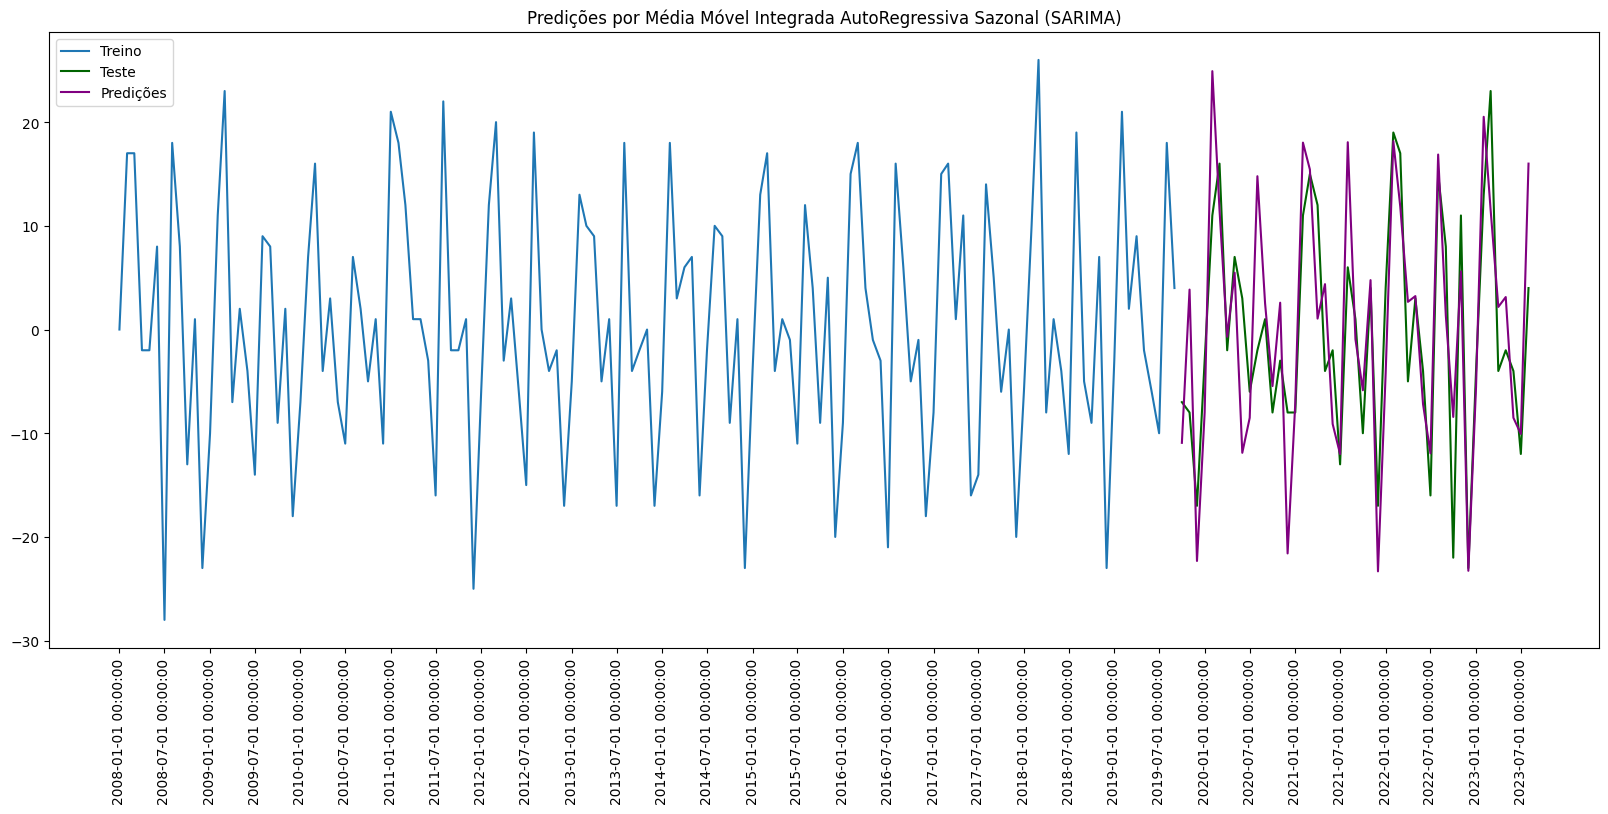

In [215]:
plt.figure(figsize=(20, 8))
plt.plot(treino['Mês'],treino['Diferenca'],label="Treino")
plt.plot(teste['Mês'], teste['Diferenca'], label="Teste", color="darkgreen")
plt.plot(resultadoSarima['Mês'], resultadoSarima['Predição'],
         label='Predições', color='purple')

plt.xticks(df['Mês'][::6], df['Mês'][::6], rotation='vertical')
plt.legend(loc='best')
plt.title("Predições por Média Móvel Integrada AutoRegressiva Sazonal (SARIMA)")

plt.show()

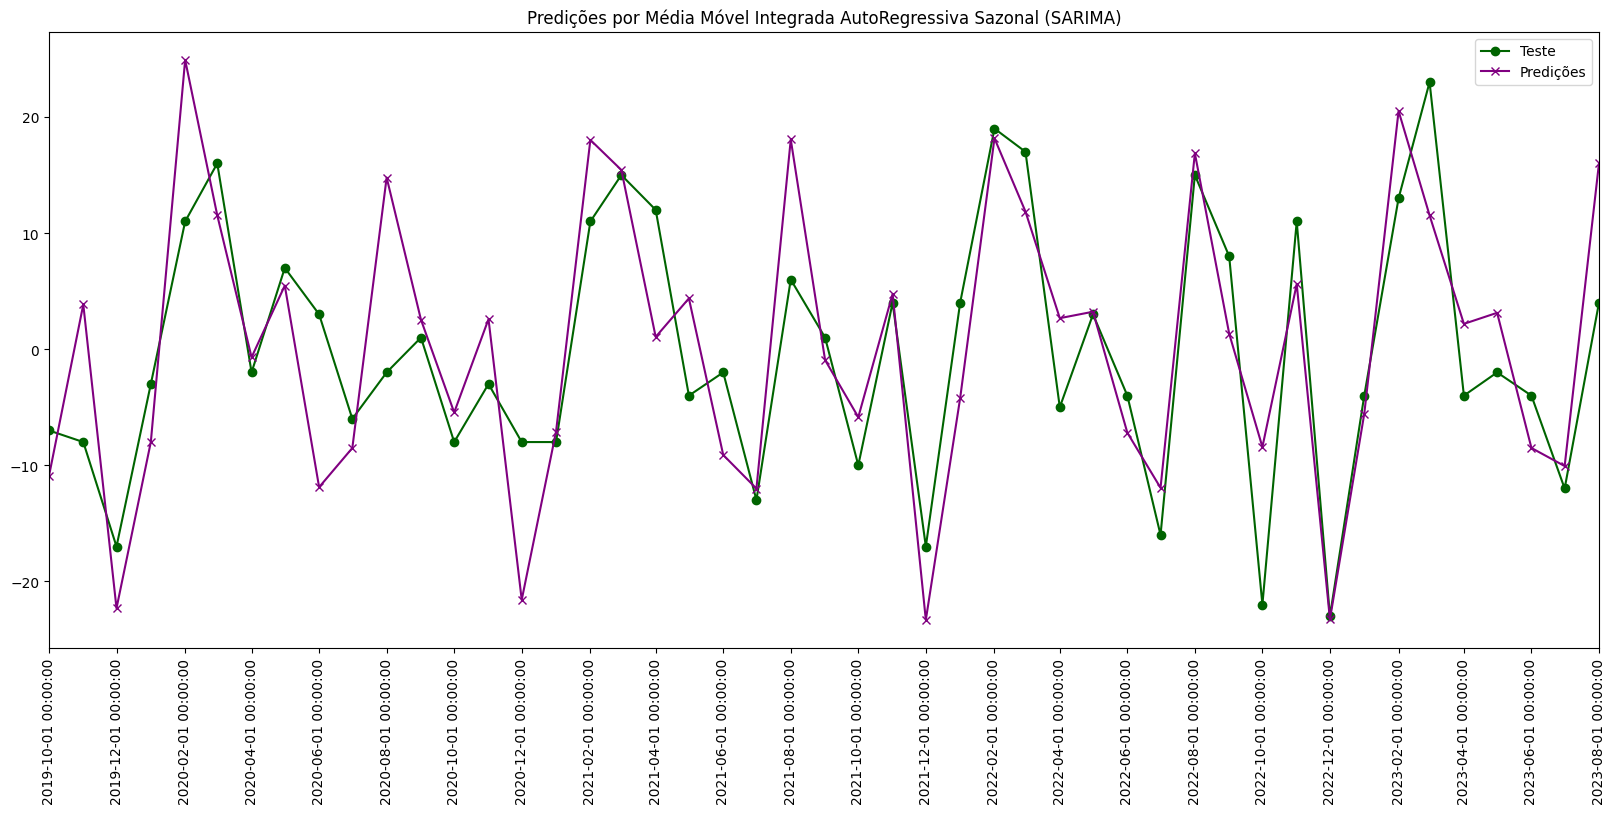

In [219]:
# Plotando previsões (SARIMA)
plt.figure(figsize=(20, 8))

plt.plot(teste['Mês'], teste['Diferenca'],
         label="Teste", color="darkgreen",marker='o')

plt.plot(resultadoSarima['Mês'], resultadoSarima['Predição'],
         label='Predições', color='purple',marker='x')

plt.xticks(resultadoSarima['Mês'][::2],
           resultadoSarima['Mês'][::2],
           rotation='vertical')

plt.xlim(teste['Mês'].iloc[0],
         resultadoSarima['Mês'].iloc[-1])

plt.legend(loc='best')
plt.title("Predições por Média Móvel Integrada AutoRegressiva Sazonal (SARIMA)")

plt.show()

In [217]:
# Revertendo valores Diferenciados

predicaoRevertidaSarima = resultadoSarima['Predição']
testeSarima = teste['Geo: Brasil']

# Usando a função criada "reversaoDiferenca" para retornar os dados.
dadosRevertidosSarima = reversaoDiferenca(
    predicaoRevertidaSarima,
    testeSarima,
    primeiroValorTeste)

print(dadosRevertidosSarima)

     Valores Reais  Valores Preditos
141             83         72.074322
142             75         75.925106
143             58         53.608380
144             55         45.613395
145             66         70.529288
146             82         82.061618
147             80         81.362919
148             87         86.841697
149             90         74.955333
150             84         66.444291
151             82         81.227998
152             83         83.763333
153             75         78.311275
154             72         80.899072
155             64         59.309403
156             56         52.208896
157             67         70.231646
158             82         85.665982
159             94         86.720893
160             90         91.096356
161             88         81.985432
162             75         69.978479
163             81         88.040588
164             82         87.106689
165             72         81.250101
166             76         86.014365
1

In [220]:
# Medindo o desempenho dados revertidos
from sklearn.metrics import mean_squared_error as erroQuadratico
from math import sqrt
rmseRevertidoSarima = sqrt(
    erroQuadratico(dadosRevertidosSarima['Valores Reais'],
                   dadosRevertidosSarima['Valores Preditos']))
print("ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: %.3f"
      % rmseRevertidoSarima)

ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: 6.628


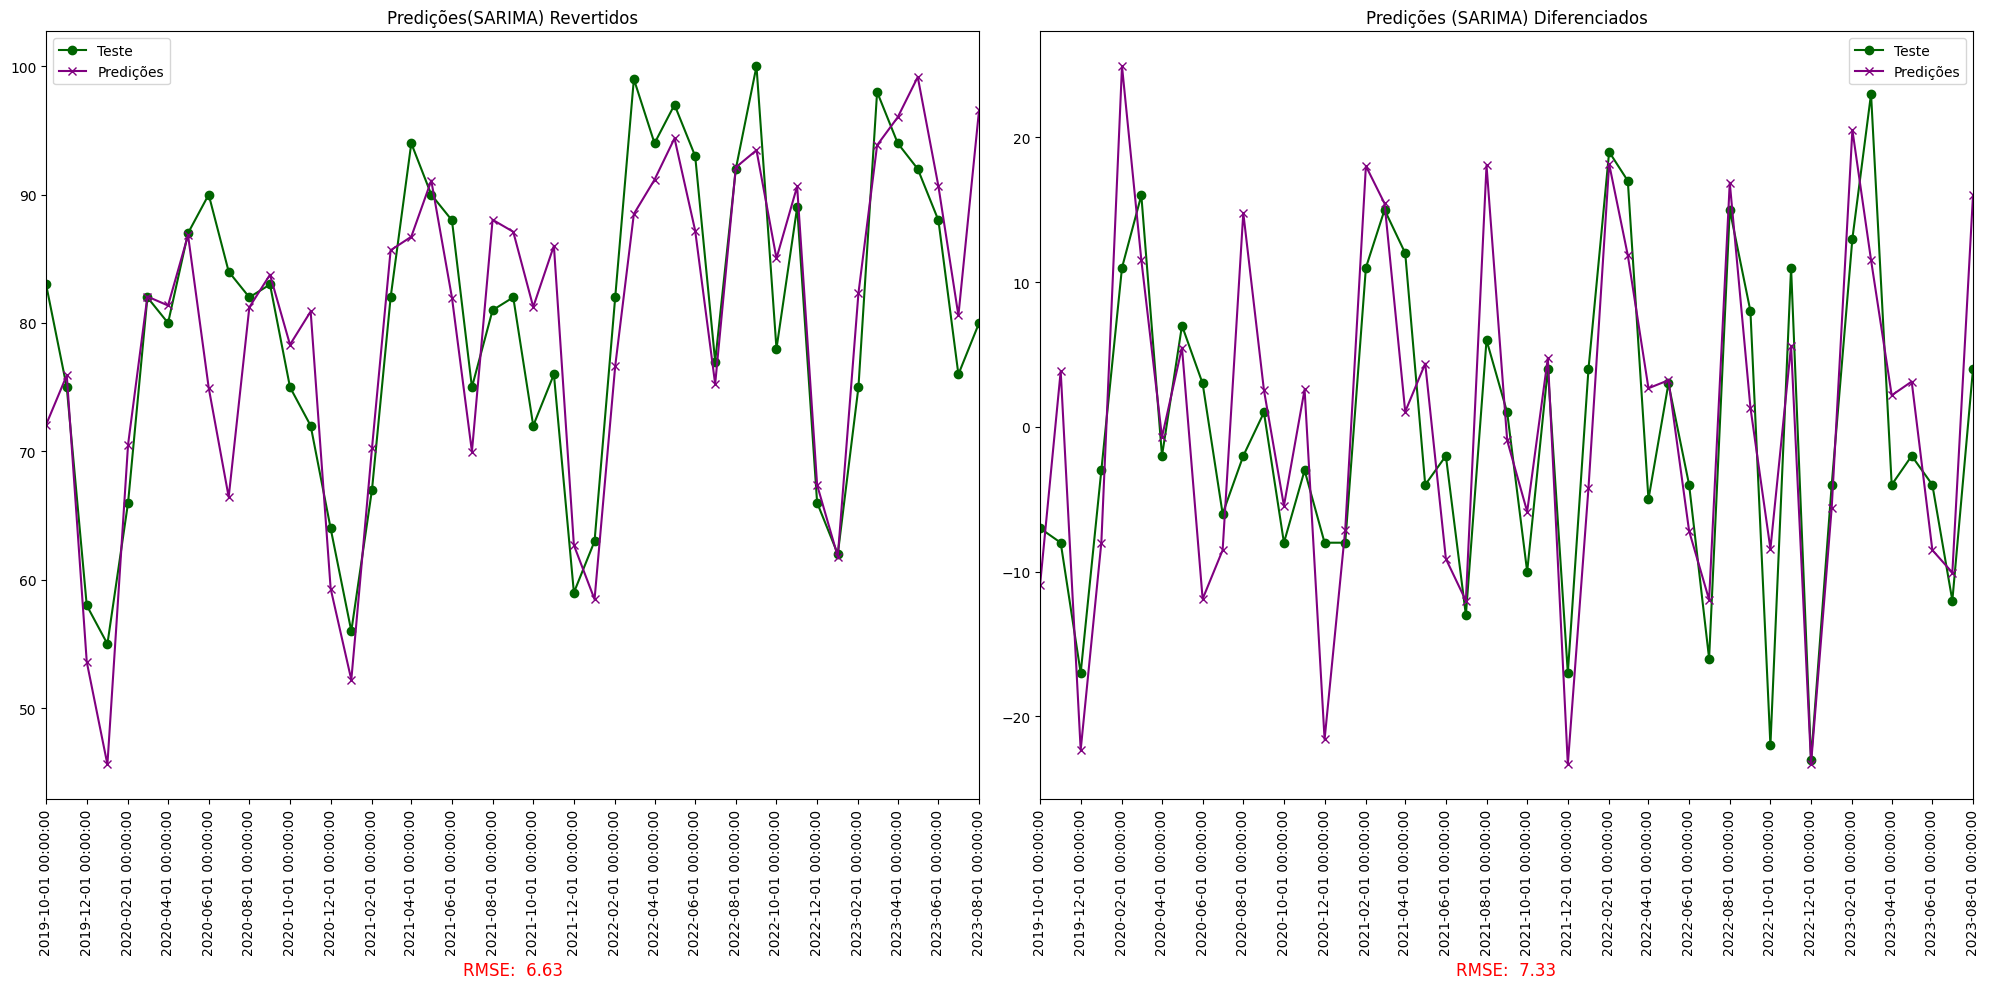

In [222]:
# Plotando os gráficos dos valores diferenciados e revertidos
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1 - Valores Reais e Valores Preditos Revertidos
axs[0].plot(resultadoSarima['Mês'],
            dadosRevertidosSarima['Valores Reais'],
            label="Teste", color="darkgreen",marker='o')

axs[0].plot(resultadoSarima['Mês'],
            dadosRevertidosSarima['Valores Preditos'],
            label='Predições', color='purple',marker='x')

axs[0].set_xticks(resultadoSarima['Mês'][::2])
axs[0].set_xticklabels(resultadoSarima['Mês'][::2], rotation='vertical')
axs[0].set_xlim(resultadoSarima['Mês'].iloc[0], resultadoSarima['Mês'].iloc[-1])
axs[0].legend(loc='best')
axs[0].set_title("Predições(SARIMA) Revertidos")
axs[0].set_xlabel(f"RMSE: {rmseRevertidoSarima: .2f}",fontsize=12,color='red')

# Gráfico 2 - Valores Reais e Valores Preditos Diferenciados
axs[1].plot(resultadoSarima['Mês'],
            teste['Diferenca'],
            label="Teste",
            color="darkgreen",marker='o')

axs[1].plot(resultadoSarima['Mês'],
            resultadoSarima['Predição'],
            label='Predições',
            color='purple',marker='x')

axs[1].set_xticks(resultadoSarima['Mês'][::2])
axs[1].set_xticklabels(resultadoSarima['Mês'][::2], rotation='vertical')
axs[1].set_xlim(resultadoSarima['Mês'].iloc[0], resultadoSarima['Mês'].iloc[-1])
axs[1].legend(loc='best')
axs[1].set_title("Predições (SARIMA) Diferenciados")
axs[1].set_xlabel(f"RMSE: {rmseSarima: .2f}",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [223]:
# Instalação de pacote para o modelo AUTO ARIMA
!pip install pmdarima


In [224]:
from pmdarima.arima import auto_arima as autoArima

In [225]:
# Criando modelo auto arima usando todos esses hiperparâmetros
modeloAutoArima =autoArima (
    treino['Diferenca'],
    seasonal=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False,
    approximation=False,
    start_p=0,
    start_d=1,
    start_q=0,
    max_p=2,
    max_d=1,
    max_q=2,
    start_P=0,
    start_D=1,
    start_Q=0,
    max_P=2,
    max_D=1,
    max_Q=2,
    m=12,  # Período sazonal, 12 para dados mensais
    trace=True ) # Exibir informações detalhadas)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1098.232, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1031.656, Time=0.09 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1025.003, Time=0.35 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=982.829, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1100.058, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1030.664, Time=0.11 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1021.881, Time=0.41 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=973.677, Time=0.10 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,1)(2,0,0)[12] interce

In [226]:
# Ajuste do modelo ARIMA retornando a melhor combinação via auto arima
# retorna o melhor modelo baseado no menor valor de AIC
# AIC=2k−2ln(L)
# k é o número de parâmetros no modelo.
# L é o valor máximo da função de verossimilhança (likelihood) do modelo.
print(modeloAutoArima)

 ARIMA(2,0,1)(1,0,1)[12] intercept


In [231]:
# Predição do modelo
predicaoAutoArima = modeloAutoArima.predict(
    n_periods=teste.shape[0])
predicaoAutoArima.name = "Predições"
resultadoAutoArima = pd.concat([teste,predicaoAutoArima],
                               axis=1).reindex(teste.index)
print(resultadoAutoArima)

           Mês  Geo: Brasil  Diferenca   Ano  Mês_do_Ano  Predições
141 2019-10-01           83       -7.0  2019          10  -7.097380
142 2019-11-01           75       -8.0  2019          11   1.695492
143 2019-12-01           58      -17.0  2019          12 -19.544598
144 2020-01-01           55       -3.0  2020           1  -4.039540
145 2020-02-01           66       11.0  2020           2  14.184993
146 2020-03-01           82       16.0  2020           3  14.329595
147 2020-04-01           80       -2.0  2020           4   0.550084
148 2020-05-01           87        7.0  2020           5   1.588024
149 2020-06-01           90        3.0  2020           6  -5.252022
150 2020-07-01           84       -6.0  2020           7 -13.522724
151 2020-08-01           82       -2.0  2020           8  15.166548
152 2020-09-01           83        1.0  2020           9   2.672408
153 2020-10-01           75       -8.0  2020          10  -6.638899
154 2020-11-01           72       -3.0  2020    

In [229]:
# Medindo o desempenho dados
rmseAutoArima = sqrt(erroQuadratico(teste['Diferenca'],predicaoAutoArima))
print("Auto Arima - Raiz Quadrada do Erro Médio (RMSE): %.3f" % rmseAutoArima)

Auto Arima - Raiz Quadrada do Erro Médio (RMSE): 6.147


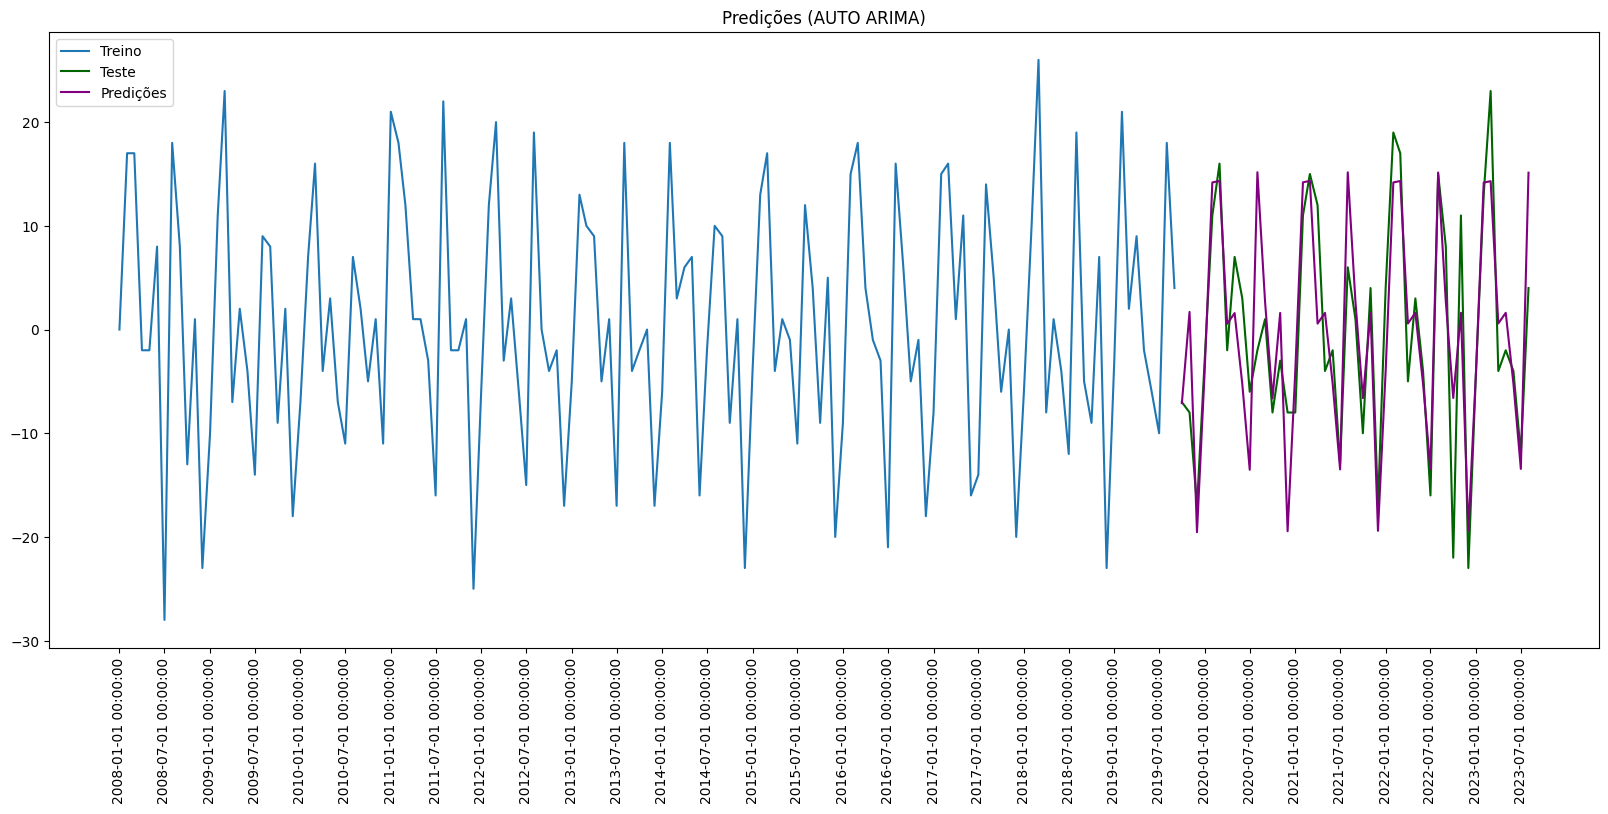

In [234]:
plt.figure(figsize=(20, 8))
plt.plot(treino['Mês'],
         treino['Diferenca'],
         label="Treino")

plt.plot(teste['Mês'],
         teste['Diferenca'],
         label="Teste",
         color="darkgreen")

plt.plot(resultadoSarima['Mês'],
         resultadoAutoArima['Predições'],
         label='Predições',
         color='purple')

plt.xticks(df['Mês'][::6], df['Mês'][::6], rotation='vertical')
plt.legend(loc='best')
plt.title("Predições (AUTO ARIMA)")

plt.show()

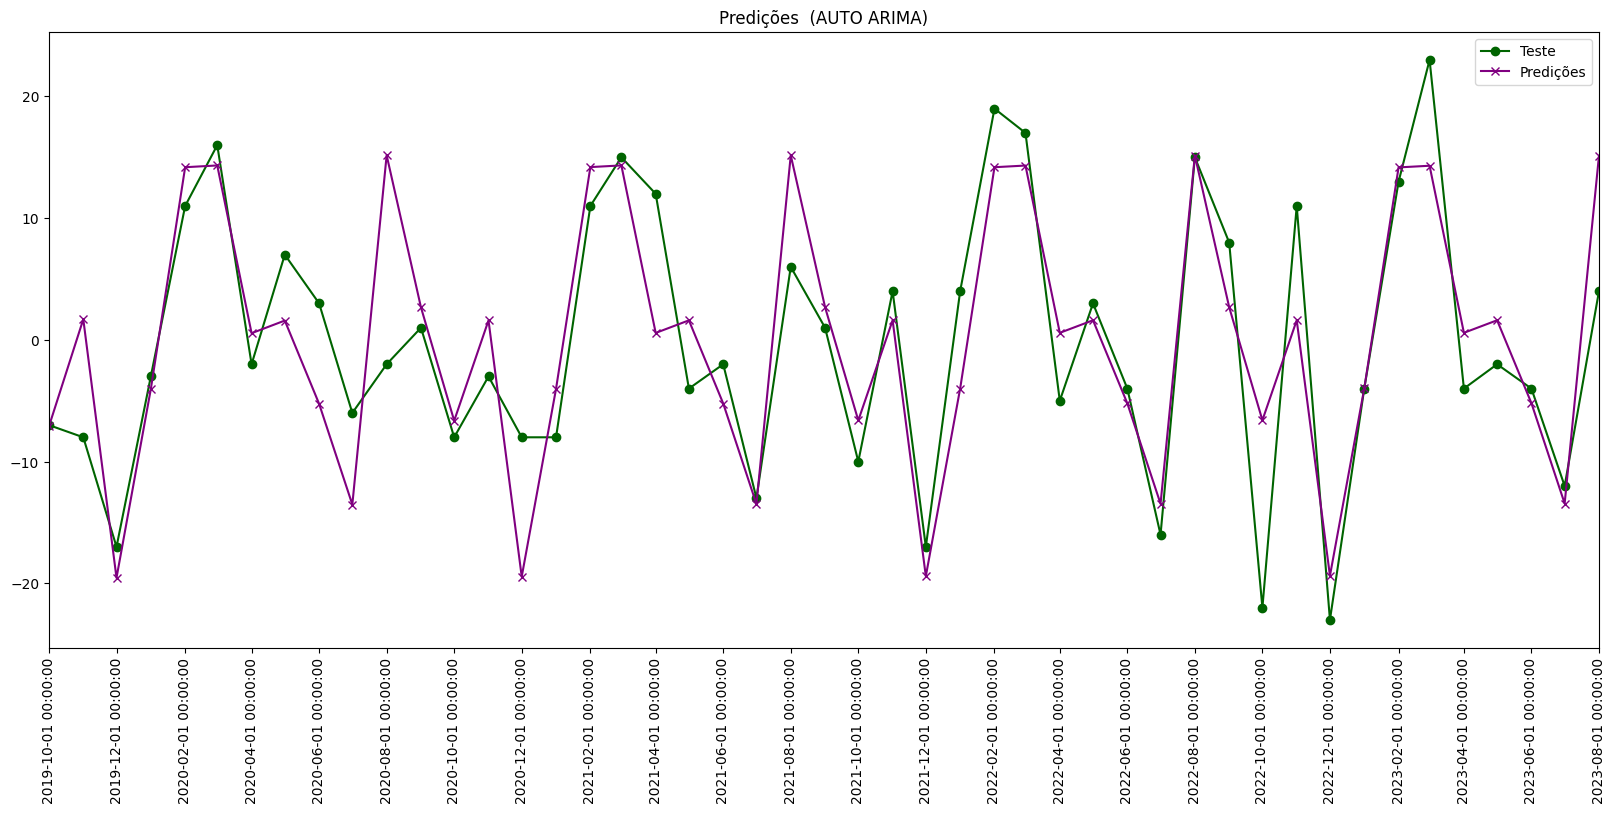

In [235]:
# Plotando previsões (AUTOARIMA)
plt.figure(figsize=(20, 8))

plt.plot(resultadoAutoArima['Mês'],
         resultadoAutoArima['Diferenca'],
         label="Teste", color="darkgreen",marker='o')

plt.plot(resultadoAutoArima['Mês'],
         resultadoAutoArima['Predições'],
         label='Predições', color='purple',marker='x')

plt.xticks(resultadoAutoArima['Mês'][::2],
           resultadoAutoArima['Mês'][::2],
           rotation='vertical')

plt.xlim(resultadoAutoArima['Mês'].iloc[0],
         resultadoAutoArima['Mês'].iloc[-1])

plt.legend(loc='best')
plt.title("Predições  (AUTO ARIMA)")

plt.show()

In [236]:
# Revertendo valores Diferenciados
predicaoRevertidaAutoArima = resultadoAutoArima['Predições']
testeAutorArima = teste['Geo: Brasil']
# Usando a função "reversaoDiferenca" para reverter os dados usando o cumsum()
dadosRevertidosAutoArima = reversaoDiferenca(predicaoRevertidaAutoArima,
                                             testeAutorArima,
                                             primeiroValorTeste)


In [237]:
# Medindo o desempenho dados revertidos
rmseRevertidoautoArima = sqrt(erroQuadratico(
    dadosRevertidosAutoArima['Valores Reais'],
    dadosRevertidosAutoArima['Valores Preditos']))
print("ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: %.3f"
      % rmseRevertidoautoArima)

ARMA - Raiz Quadrada do Erro Médio (RMSE) Revertido: 6.859


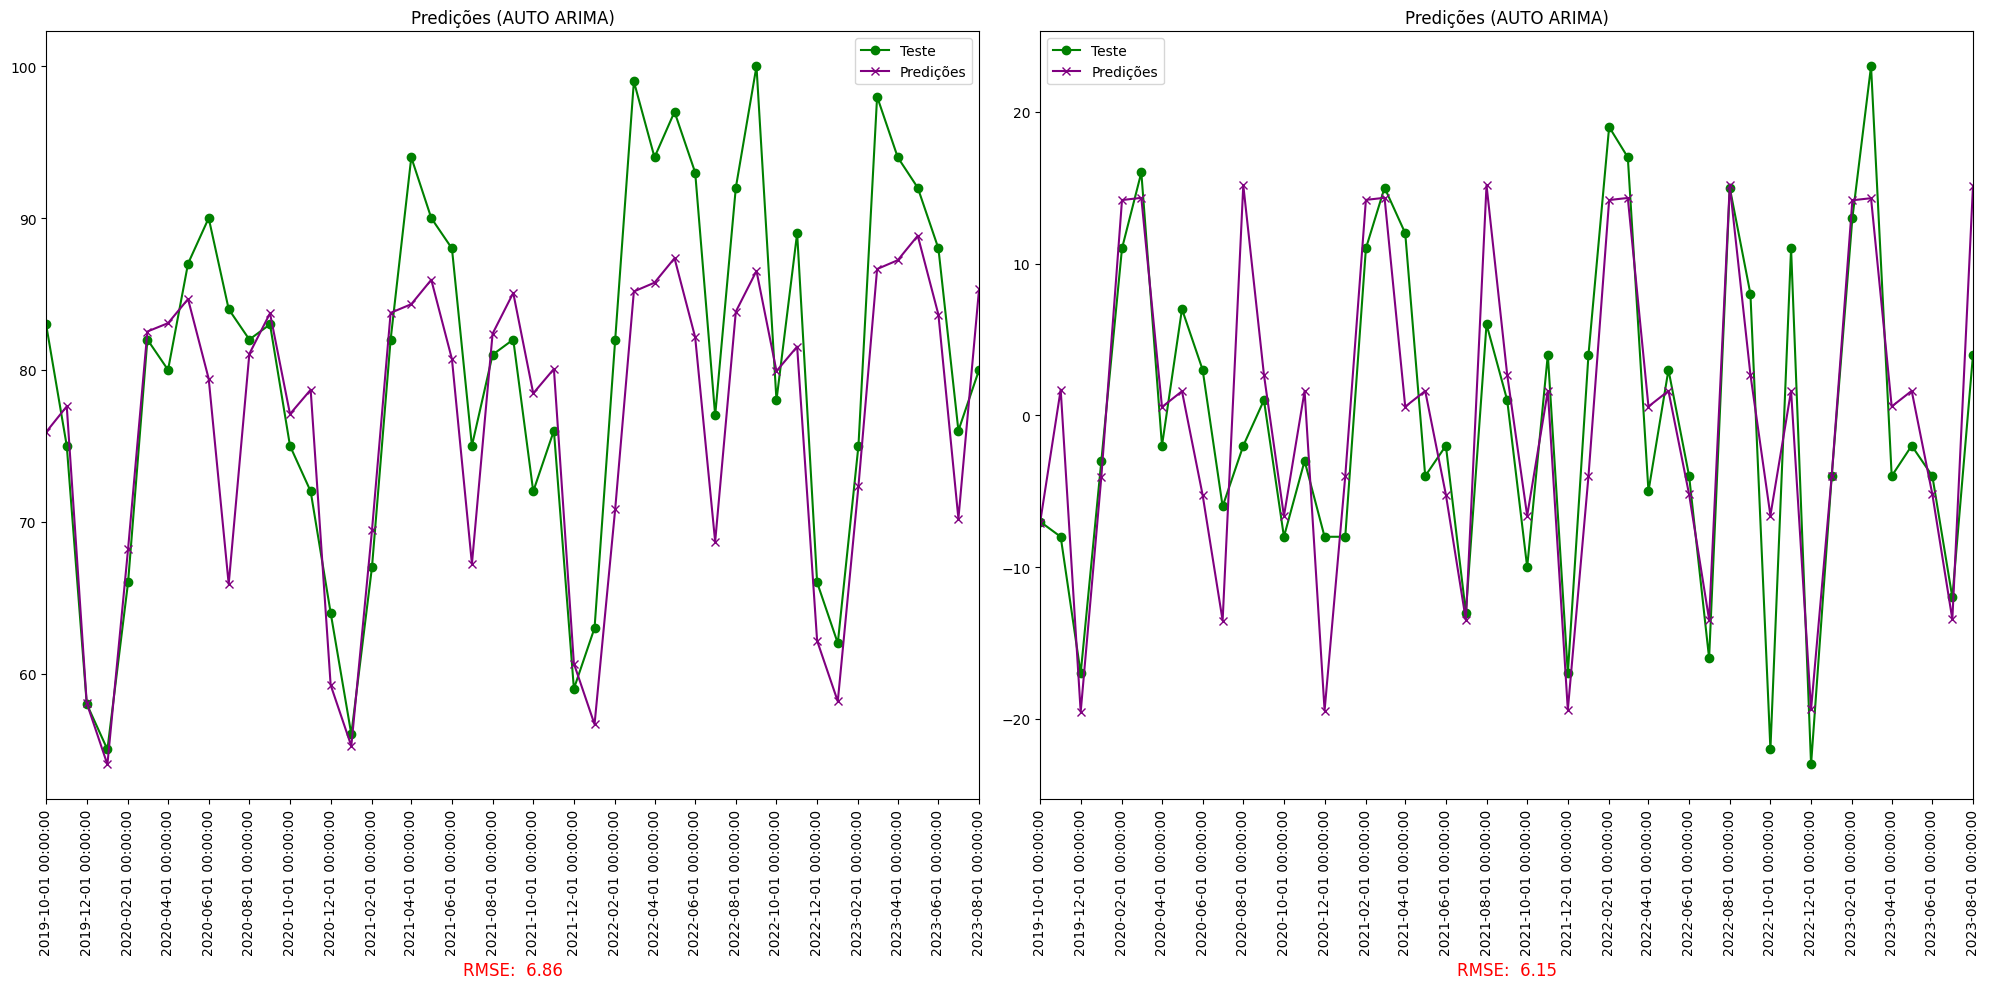

In [239]:
# Plotando os gráficos dos valores diferenciados e revertidos
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1 - Valores Reais e Valores Preditos Revertidos
axs[0].plot(resultadoAutoArima['Mês'],
            dadosRevertidosAutoArima['Valores Reais'],
            label="Teste",marker='o',color='green')

axs[0].plot(resultadoAutoArima['Mês'],
            dadosRevertidosAutoArima['Valores Preditos'],
            label='Predições',marker='x',color='purple')
axs[0].set_xticks(resultadoAutoArima['Mês'][::2])

axs[0].set_xticklabels(resultadoAutoArima['Mês'][::2],
                       rotation='vertical')

axs[0].set_xlim(resultadoAutoArima['Mês'].iloc[0],
                resultadoAutoArima['Mês'].iloc[-1])
axs[0].legend(loc='best')

axs[0].set_title("Predições (AUTO ARIMA)")
axs[0].set_xlabel(f"RMSE: {rmseRevertidoautoArima: .2f}",
                  fontsize=12,
                  color='red')

# Gráfico 2 - Valores Reais e Valores Preditos Diferenciados
axs[1].plot(resultadoAutoArima['Mês'],
            teste['Diferenca'],
            label="Teste",
            marker='o',color='green' )
axs[1].plot(resultadoAutoArima['Mês'],
            resultadoAutoArima['Predições'],
            label='Predições',
            marker='x',color='purple')

axs[1].set_xticks(resultadoAutoArima['Mês'][::2])
axs[1].set_xticklabels(resultadoAutoArima['Mês'][::2],
                       rotation='vertical')

axs[1].set_xlim(resultadoAutoArima['Mês'].iloc[0],
                resultadoAutoArima['Mês'].iloc[-1])

axs[1].legend(loc='best')
axs[1].set_title("Predições (AUTO ARIMA)")
axs[1].set_xlabel(f"RMSE: {rmseAutoArima: .2f}",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [253]:
# Criando um novo Banco de dados usando o Anterior para aplicação do modelo
# Random Forest Usando o modelo Univariado
dfRandom = df

In [242]:
# Transformar a coluna 'Mês' em datetime
dfRandom['Mês'] = pd.to_datetime(dfRandom['Mês'])

# Criar colunas de mês e ano separados
dfRandom['Ano'] = dfRandom['Mês'].dt.year
dfRandom['Mês_do_Ano'] = dfRandom['Mês'].dt.month

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [244]:
# Classificando as variáveis para preparar o modelo RandomForest
colunasClassificadasUni = ['Ano','Mês_do_Ano']
caracteristicasUni = dfRandom[colunasClassificadasUni].values
previsorUni = dfRandom['Geo: Brasil'].values

In [283]:
# Separando os dados em 80% treino e 20% teste
xTrein,xTest,yTrein,yTest = train_test_split(
    caracteristicasUni,
    previsorUni,
    test_size=0.20,
    random_state=10
)

In [284]:
print("Dados Treino separados com 80% = ",len(xTrein))
print("Dados Teste separados com 20% = ",len(xTest))

Dados Treino separados com 80% =  150
Dados Teste separados com 20% =  38


In [285]:
from sklearn.ensemble import RandomForestRegressor
# Gerando 500 árvores de decisão e escolhendo o que melhor modelo
# Cada árvore em uma floresta aleatória é construída usando uma técnica chamada
# "bagging" (bootstrap aggregating) e também introduz um componente adicional
# de aleatoriedade. Aqui está um resumo do processo:
# Bagging (Amostragem de Bootstrap),Seleção de Recursos Aleatórios,
# Construção da Árvore e Votação. A previsão final é calculada por meio de uma
# votação ou média das previsões de todas as árvores
#(dependendo do problema de classificação ou regressão).

algoritmoFlorestaUni = RandomForestRegressor(n_estimators=500)


In [286]:
# Treinamento do Modelo de Floresta Aleatória
algoritmoFlorestaUni.fit(xTrein,yTrein)

RandomForestRegressor(n_estimators=500)

In [287]:
# Previsões do Modelo de Floresta Aleatória
previsoesFlorestaUni = algoritmoFlorestaUni.predict(xTest)

In [288]:
# Calculando o Erro Quadrático Médio
rmseFlorestaUni = sqrt(mean_squared_error(yTest,previsoesFlorestaUni))
print(rmseFlorestaUni)

5.385453399277489


In [309]:
# Avaliação da precisão do Modelo de Floresta Aleatória
previsaoUni = algoritmoFlorestaUni.score(xTest,yTest)*100
print(f"{previsaoUni:.2f}%")

84.31%


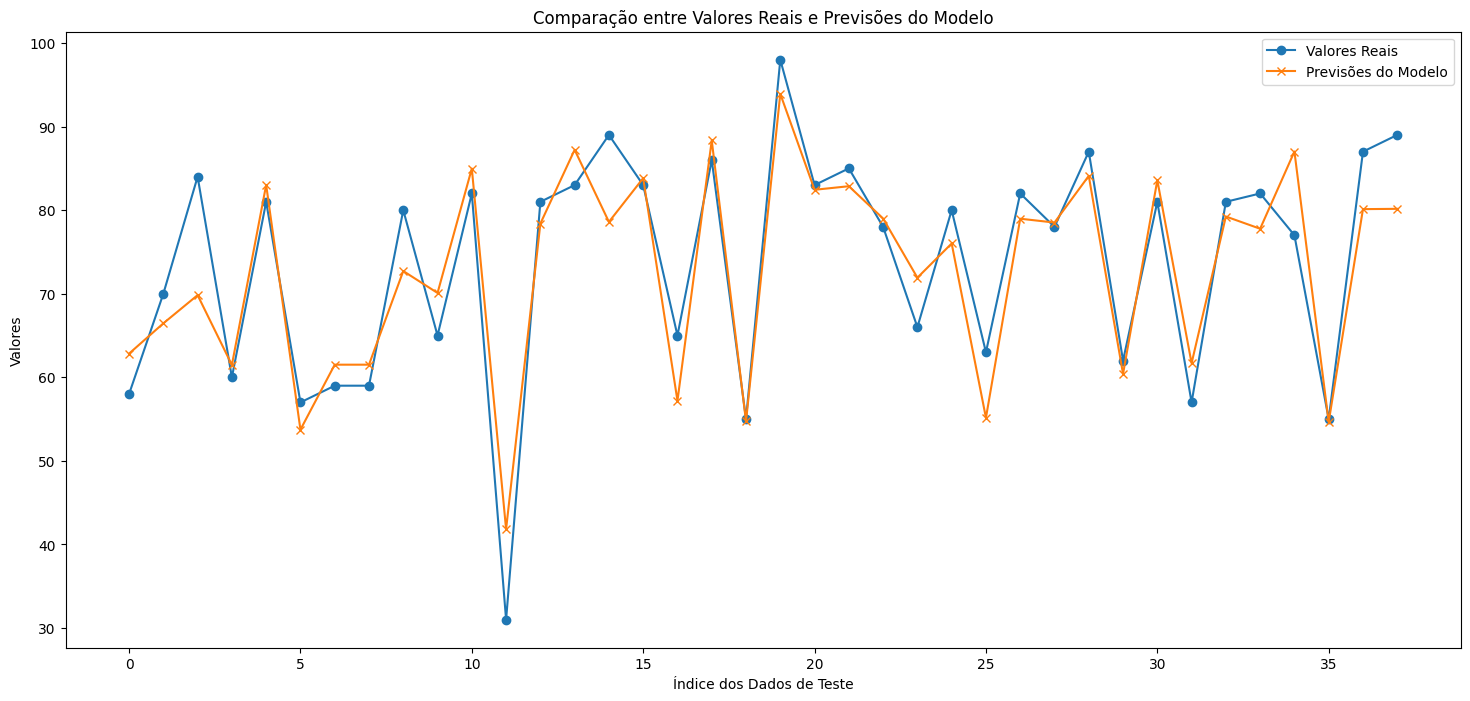

In [293]:
# Criando um array de índices para os dados de teste
indicesUni = range(len(yTest))
fig, axs = plt.subplots(figsize=(18, 8))
# Plot dos valores reais
plt.plot(indicesUni, yTest, label='Valores Reais', marker='o')
# Plot das previsões do modelo
plt.plot(indicesUni, previsoesFlorestaUni,
         label='Previsões do Modelo', marker='x')
# Configurações do gráfico
plt.xlabel('Índice dos Dados de Teste')
plt.ylabel('Valores')
plt.title('Comparação entre Valores Reais e Previsões do Modelo')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


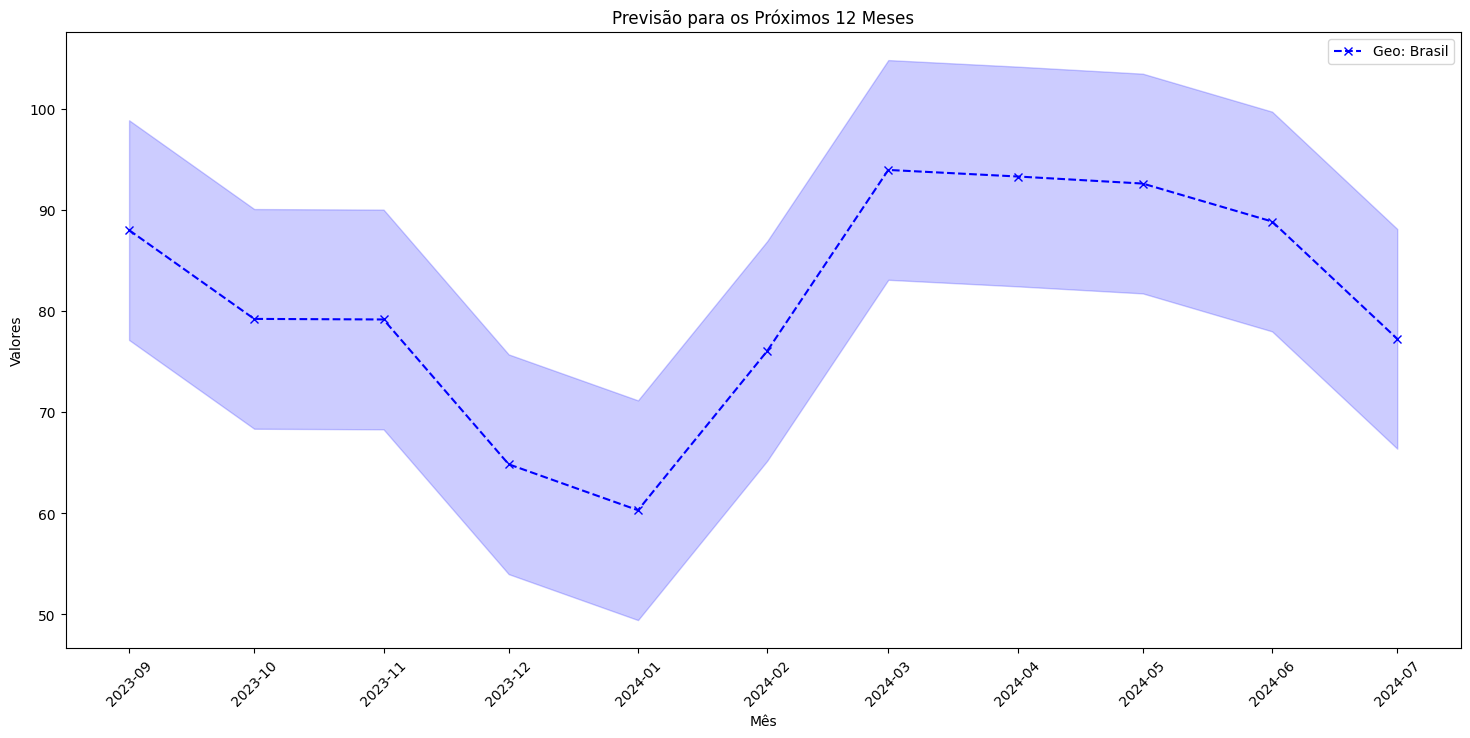

In [260]:
# Último mês no DataFrame original
ultimo_mes = dfRandom['Mês'].iloc[-1]

fig, axs = plt.subplots(figsize=(18, 8))

# Criando as características para os próximos 12 meses
proximos_mesesUni = pd.date_range(start=ultimo_mes, periods=12, freq='MS')[1:]
mesesFeaturesUni = pd.DataFrame({'Mês': proximos_mesesUni})
mesesFeaturesUni['Ano'] = mesesFeaturesUni['Mês'].dt.year
mesesFeaturesUni['Mês_do_Ano'] = mesesFeaturesUni['Mês'].dt.month

# Fazendo as previsões para os próximos 12 meses
previsoesProximosMeses = algoritmoFlorestaUni.predict(
    mesesFeaturesUni[colunasClassificadasUni])

# Plot dos valores reais e previsões para os próximos 6 meses
plt.plot(proximos_mesesUni,
         previsoesProximosMeses,
         label='Geo: Brasil',
         marker='x',
         linestyle='dashed',
         color='blue')

# Calcular o desvio padrão das previsões para cada ponto de dado
std_devUni = np.std(previsoesProximosMeses)

# Plot do desvio padrão como uma sombra para representar a dispersão
plt.fill_between(proximos_mesesUni,
                 previsoesProximosMeses - std_devUni,
                 previsoesProximosMeses + std_devUni,
                 color='blue', alpha=0.2)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Valores')
plt.title('Previsão para os Próximos 12 Meses')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [75]:
# Carregar o arquivo do computador
carregarArquivo = files.upload()
nomeArquivo = list(carregarArquivo.keys())[0]
# Carregar arquivo csv, pulando o cabeçalho
dadosMult = pd.read_csv(nomeArquivo, skiprows=[0])

Saving multivariadaTimeline.csv to multivariadaTimeline.csv


In [261]:
# Novo Banco de Dados com A frequência de Pesquisa no Youtube sobre 3
# linguagens de programação: (Python,Java e JavaScript) extraído do GoogleTrends
# A ideia é criar um exemplo multivariado usando RandomForest
dfRf = pd.DataFrame(dadosMult)
dfRf

Mês  Python: (Brasil)  Java: (Brasil)  JavaScript: (Brasil)   Ano  \
0   2008-01-01                10              19                     2  2008   
1   2008-02-01                15              24                     7  2008   
2   2008-03-01                10              24                     5  2008   
3   2008-04-01                 5              19                     7  2008   
4   2008-05-01                 8              19                     9  2008   
..         ...               ...             ...                   ...   ...   
183 2023-04-01                43              29                    32  2023   
184 2023-05-01                46              37                    33  2023   
185 2023-06-01                41              32                    41  2023   
186 2023-07-01                37              33                    29  2023   
187 2023-08-01                43              32                    32  2023   

     Mês_do_Ano  
0             1  
1             2  
2             3  
3             4  
4             5  
..          ...  
183           4  
184           5  
185           6  
186           7  
187           8  

[188 rows x 6 columns]

In [294]:
# Transformar a coluna 'Mês' em datetime
dfRf['Mês'] = pd.to_datetime(dfRf['Mês'])

# Criar colunas de mês e ano separados
dfRf['Ano'] = dfRf['Mês'].dt.year
dfRf['Mês_do_Ano'] = dfRf['Mês'].dt.month

In [295]:
dfRf

Mês  Python: (Brasil)  Java: (Brasil)  JavaScript: (Brasil)   Ano  \
0   2008-01-01                10              19                     2  2008   
1   2008-02-01                15              24                     7  2008   
2   2008-03-01                10              24                     5  2008   
3   2008-04-01                 5              19                     7  2008   
4   2008-05-01                 8              19                     9  2008   
..         ...               ...             ...                   ...   ...   
183 2023-04-01                43              29                    32  2023   
184 2023-05-01                46              37                    33  2023   
185 2023-06-01                41              32                    41  2023   
186 2023-07-01                37              33                    29  2023   
187 2023-08-01                43              32                    32  2023   

     Mês_do_Ano  
0             1  
1             2  
2             3  
3             4  
4             5  
..          ...  
183           4  
184           5  
185           6  
186           7  
187           8  

[188 rows x 6 columns]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [296]:
# Classificando as variáveis para preparar o modelo RandomForest
colunasClassificadas = ['Ano','Mês_do_Ano']
caracteristicas = dfRf[colunasClassificadas].values
# Aqui estamos usando 3 variáveis respostas como um exemplo multivariado e
# iremos ajustar um modelo que melhor responda a esse conjunto de dados..
variaveisParaPrevisao = ['Java: (Brasil)',
                         'Python: (Brasil)',
                         'JavaScript: (Brasil)']
previsor = dfRf[variaveisParaPrevisao].values

In [112]:
# Separando o conjunto de dados em 80% treino e 20% teste
xTreino,xTeste,yTreino,yTeste = train_test_split(
    caracteristicas,
    previsor,
    test_size=0.2,
    random_state=10
)

In [299]:
print("Dados de treino separados em 80% = ",len(xTreino))
print("Dados de teste separatos em 20% = ",len(xTeste))

Dados de treino separados em 80% =  150
Dados de teste separatos em 20% =  38


In [301]:
# Já foi explicado de forma bem resumida como funciona esse hiperparâmetro
# n_estimadors <- no primeiro exemplo para o conjunto univariado
from sklearn.ensemble import RandomForestRegressor
algoritmoFloresta = RandomForestRegressor(n_estimators=500)

In [302]:
# Treinamento do Modelo de Floresta Aleatória
algoritmoFloresta.fit(xTreino,yTreino)

RandomForestRegressor(n_estimators=500)

In [307]:
# Avaliação da precisão do Modelo de Floresta Aleatória
precisaoMulti = algoritmoFloresta.score(xTeste,yTeste)*100
print(f"{precisaoMulti:.2f}%")


89.97%


In [310]:
# Previsões do Modelo de Floresta Aleatória
previsoesFloresta = algoritmoFloresta.predict(xTeste)

In [311]:
# Calculando o Erro Quadrático Médio
rmseFloresta = sqrt(mean_squared_error(yTeste,previsoesFloresta))
print(rmseFloresta)

4.529483108266348


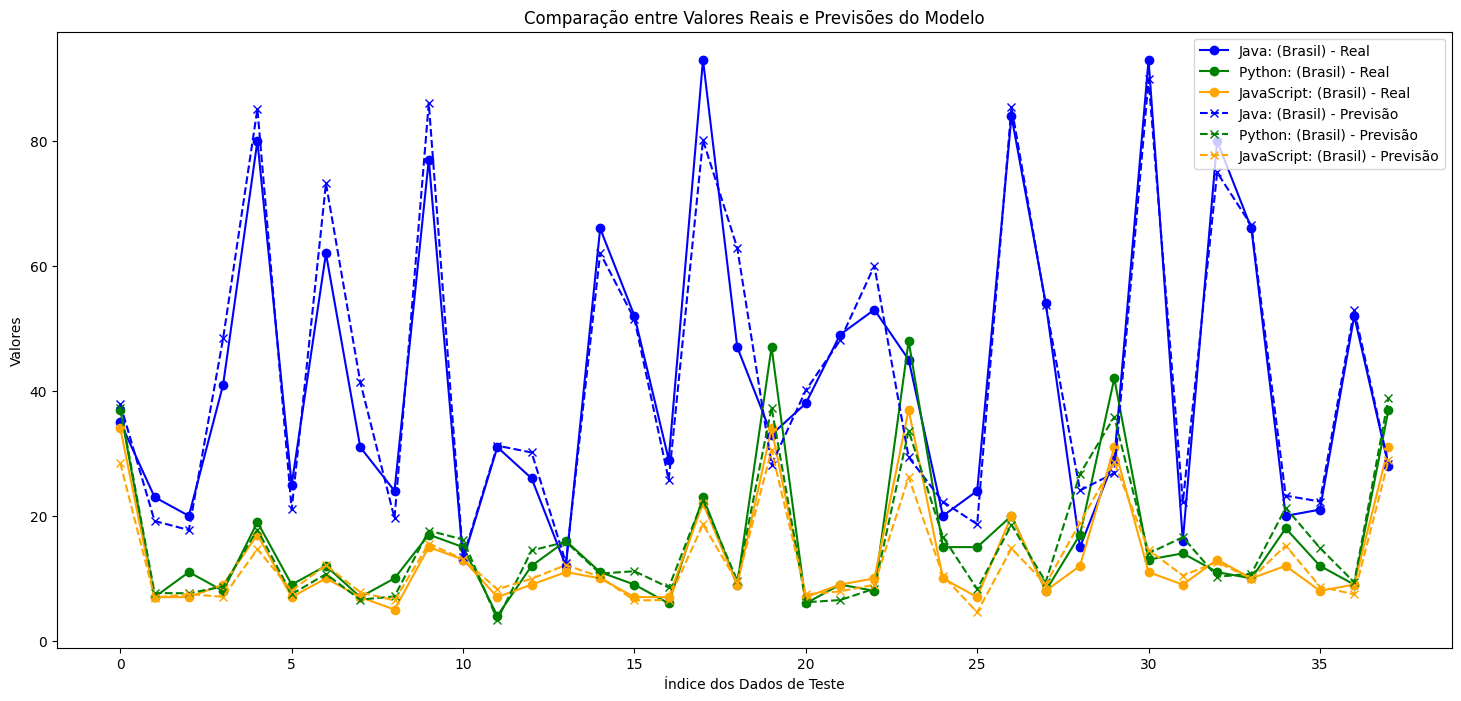

In [312]:
import matplotlib.pyplot as plt

# Criando um array de índices para os dados de teste
indices = range(len(yTeste))
fig, axs = plt.subplots(figsize=(18, 8))  # Ajuste o tamanho conforme necessário
# Plot dos valores reais
plt.plot(indices, yTeste[:, 0],
         label='Java: (Brasil) - Real',
         marker='o', color='blue')

plt.plot(indices, yTeste[:, 1],
         label='Python: (Brasil) - Real',
         marker='o', color='green')

plt.plot(indices, yTeste[:, 2],
         label='JavaScript: (Brasil) - Real',
         marker='o', color='orange')

# Plot das previsões do modelo
plt.plot(indices, previsoesFloresta[:, 0],
         label='Java: (Brasil) - Previsão',
         marker='x',
         linestyle='dashed', color='blue')

plt.plot(indices, previsoesFloresta[:, 1],
         label='Python: (Brasil) - Previsão',
         marker='x',
         linestyle='dashed', color='green')

plt.plot(indices, previsoesFloresta[:, 2],
         label='JavaScript: (Brasil) - Previsão',
         marker='x',
         linestyle='dashed', color='orange')

# Configurações do gráfico
plt.xlabel('Índice dos Dados de Teste')
plt.ylabel('Valores')
plt.title('Comparação entre Valores Reais e Previsões do Modelo')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


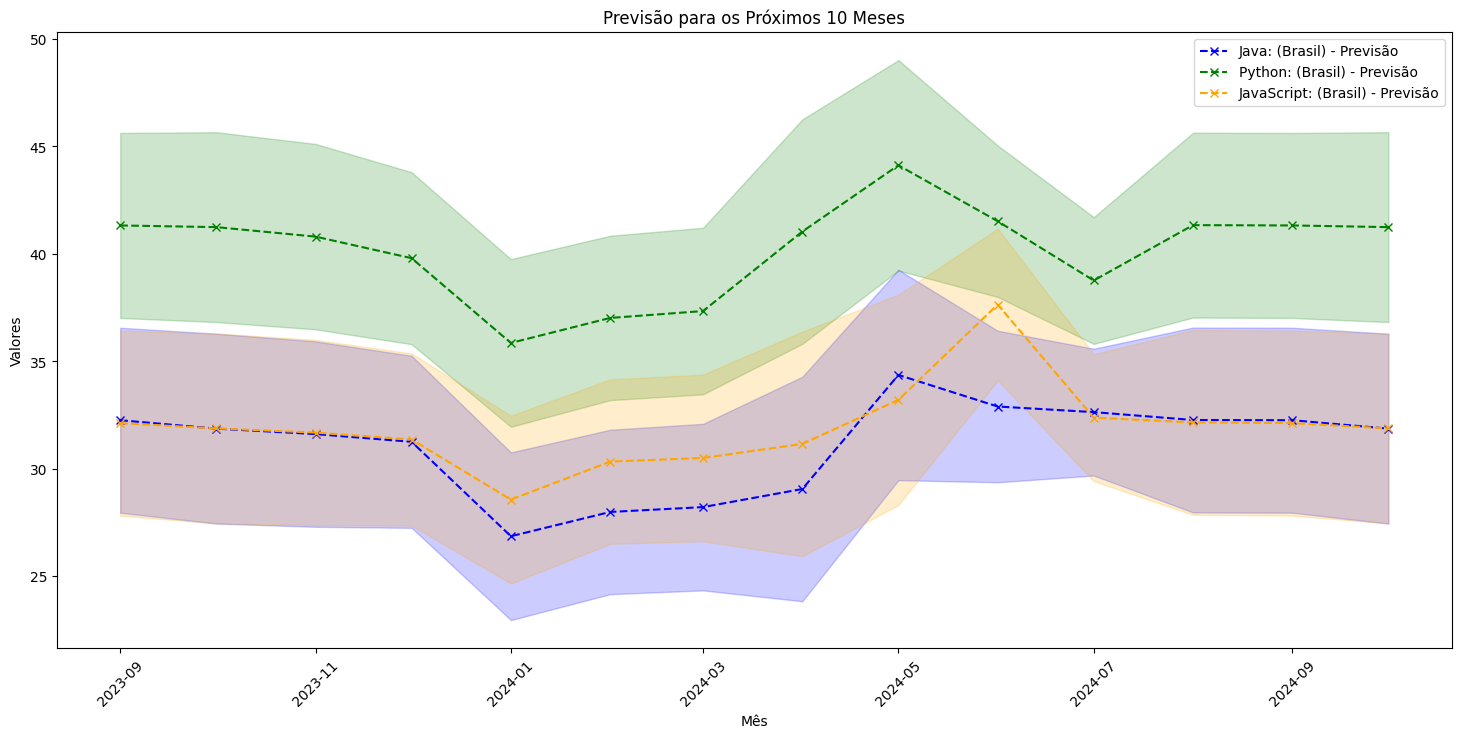

In [313]:
# Último mês no DataFrame original
ultimo_mes = dfRf['Mês'].iloc[-1]
fig, axs = plt.subplots(figsize=(18, 8))
# Criando as características para os próximos 10 meses

proximos_meses = pd.date_range(start=ultimo_mes, periods=15, freq='MS')[1:]
proximos_meses_features = pd.DataFrame({'Mês': proximos_meses})
proximos_meses_features['Ano'] = proximos_meses_features['Mês'].dt.year
proximos_meses_features['Mês_do_Ano'] = proximos_meses_features['Mês'].dt.month

# Fazendo as previsões para os próximos 6 meses
previsoes_proximos_meses = algoritmoFloresta.predict(
    proximos_meses_features[colunasClassificadas])

# Plot dos valores reais e previsões para os próximos 12 meses
plt.plot(proximos_meses,
         previsoes_proximos_meses[:, 0],
         label='Java: (Brasil) - Previsão',
         marker='x',
         linestyle='dashed', color='blue')

plt.plot(proximos_meses,
         previsoes_proximos_meses[:, 1],
         label='Python: (Brasil) - Previsão',
         marker='x',
         linestyle='dashed',color='green')

plt.plot(proximos_meses,
         previsoes_proximos_meses[:, 2],
         label='JavaScript: (Brasil) - Previsão',
         marker='x',
         linestyle='dashed', color='orange')

# Calcular o desvio padrão das previsões para cada ponto de dado
std_dev = np.std(previsoes_proximos_meses, axis=1)

# Plot do desvio padrão como uma sombra para representar a dispersão
plt.fill_between(proximos_meses,
                 previsoes_proximos_meses[:, 0] - std_dev,
                 previsoes_proximos_meses[:, 0] + std_dev,
                 color='blue', alpha=0.2)

plt.fill_between(proximos_meses,
                 previsoes_proximos_meses[:, 1] - std_dev,
                 previsoes_proximos_meses[:, 1] + std_dev,
                 color='green', alpha=0.2)

plt.fill_between(proximos_meses,
                 previsoes_proximos_meses[:, 2] - std_dev,
                 previsoes_proximos_meses[:, 2] + std_dev,
                 color='orange', alpha=0.2)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Valores')
plt.title('Previsão para os Próximos 10 Meses')
plt.legend()
plt.xticks(rotation=45)
plt.show()